# Import Libraries

In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold



2022-11-28 21:44:15.050940: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Plot Param Initialization

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    #


# Raw Data Reading 

In [3]:
data_frame = pd.read_csv('Occupancy_Estimation.csv')
# train, test = train_test_split(data_frame, test_size=0.2)
data_frame.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

# Correlation Analysis for the Raw feature Space 

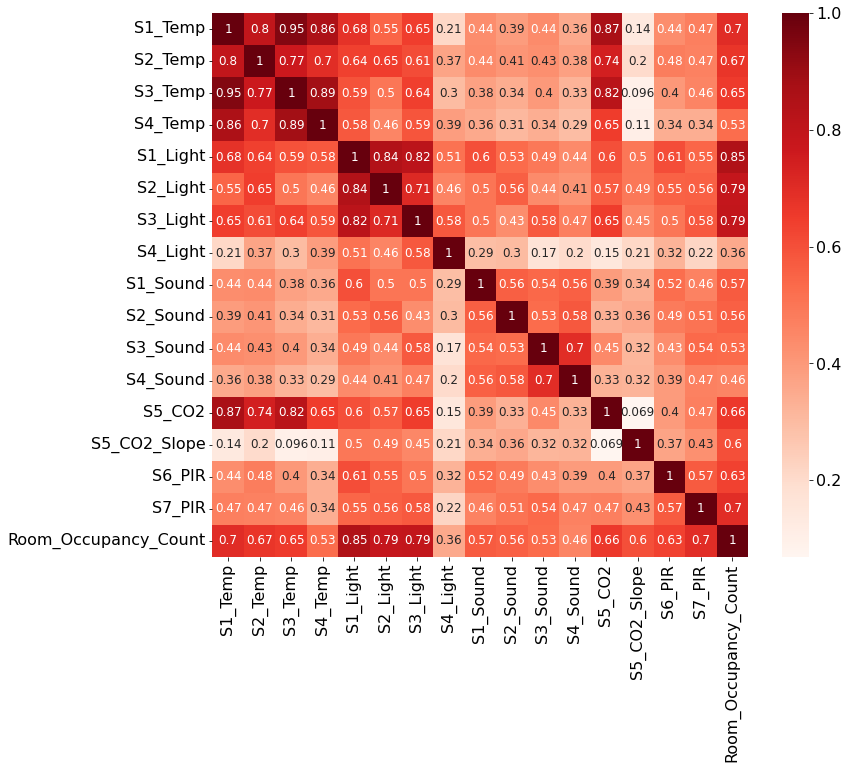

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data_frame.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("squares.png",bbox_inches= "tight")
plt.show()

# Class Imbalance in Raw Data

In [31]:
class_0 = len(data_frame[data_frame['Room_Occupancy_Count']==0])
class_1 = len(data_frame[data_frame['Room_Occupancy_Count']==1])
class_2 = len(data_frame[data_frame['Room_Occupancy_Count']==2])
class_3 = len(data_frame[data_frame['Room_Occupancy_Count']==3])
class_0,class_1,class_2,class_3

(8228, 459, 748, 694)

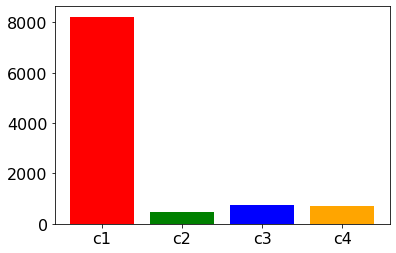

In [32]:
plt.bar(['c1','c2','c3','c4'],[class_0,class_1,class_2,class_3],color = ['red','green','blue','orange'])
plt.savefig("class_imbalance.png",bbox_inches= "tight")
plt.show()

# Resolve Class Imbalance Manually 
c1 = 8228 its 10% is 822.8 <br> Hence almost 90% can be removed to make the class size balanced. Such that it does not learn any bias information

In [33]:
c1_indices = data_frame.index[data_frame['Room_Occupancy_Count']==0]
dataframe_pruned = data_frame.drop(c1_indices[:int(len(c1_indices) * 0.90)]) 
len(dataframe_pruned)

2724

# Class imbalance by Stratified Sampling

In [34]:
strtified_sample_frame = data_frame.groupby('Room_Occupancy_Count', group_keys=False).apply(lambda x: x.sample(200))
len(strtified_sample_frame)

# Feature Selection and Data Processing for NN

In [36]:
# data_frame_x = dataframe_pruned.drop(['Date','Time','Room_Occupancy_Count'], axis=1)
# data_frame_y = dataframe_pruned['Room_Occupancy_Count']

In [1]:
# X = np.array(data_frame_x)
# Y = np.array(data_frame_y)
# print("***X***")
# print(X)
# print("***Y***")
# print(Y)

# Create Labels for the NN Training 

In [2]:
# # Y = to_categorical(Y)
# lable_encoder = LabelEncoder()
# lable_encoder.fit(Y)
# Y = lable_encoder.transform(Y)
# Y = to_categorical(Y)
# Y

In [3]:
# train_xx, test_xx, train_yy, test_yy = train_test_split(X,Y, test_size = 0.20)
# train_xx.shape, train_yy.shape, test_xx.shape, test_yy.shape

In [4]:
# test_size = 100
# pred = model.predict(test_xx[:test_size])
# pred_ = np.argmax(pred, axis=1)
# # pred_ = np.argmax(to_categorical(pred), axis = 1)
# pred_ = lable_encoder.inverse_transform(pred_)
# # print(pred_)
# true_y = lable_encoder.inverse_transform(np.argmax(to_categorical(test_yy[:test_size]), axis = 1)[:,1])
# room_estimation_performance_report = classification_report(true_y, pred_,output_dict=True) 
# # to plot the classification report we need to add  output_dict = True
# print(room_estimation_performance_report)
# # for i,j in zip(pred_, true_y):
# #     print("Predicted: {}, True: {}".format(i, j))

In [5]:
# sns.heatmap(pd.DataFrame(room_estimation_performance_report).iloc[:-1, :].T, annot=True)
# plt.savefig("performance_plot_NN.png",bbox_inches= "tight")
# plt.show()

In [6]:
# conf_matrix=confusion_matrix(true_y,pred_)
# print(conf_matrix)

In [7]:
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'],marker = 'D',label ='train')
# plt.plot(history.history['val_accuracy'],marker = '<',label='valid')
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# # plt.legend(['train', 'test'], loc='upper left')
# plt.legend()
# plt.savefig("accuracy_plot.png",bbox_inches= "tight")
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'],marker = 'D',label ='train')
# plt.plot(history.history['val_loss'],marker = '<',label='valid')
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend()
# plt.savefig("loss_plot_nn.png",bbox_inches= "tight")
# plt.show()

In [8]:
# scores = model.evaluate(test_xx, test_yy)
# for i, m in enumerate(model.metrics_names):
#     print("\n%s: %.3f"% (m, scores[i]))

In [9]:
# sns.heatmap(conf_matrix, annot=True)
# plt.savefig("confusion_matrix_plot.png",bbox_inches= "tight")
# plt.show()

# Original Data By Stratified Sampling

In [3]:
org_train_frame_x = pd.read_csv('data/original/original_x_train.csv')
org_train_frame_y = pd.read_csv('data/original/original_y_train.csv')
org_test_frame_x = pd.read_csv('data/original/original_x_test.csv')
org_test_frame_y = pd.read_csv('data/original/original_y_test.csv')

#  Normalized Data 

In [4]:
mNorm_train_frame_x = pd.read_csv('data/mNorm/X_train.csv')
mNorm_train_frame_y = pd.read_csv('data/mNorm/y_train.csv')
mNorm_test_frame_x = pd.read_csv('data/mNorm/X_test.csv')
mNorm_test_frame_y = pd.read_csv('data/mNorm/y_test.csv')

In [5]:
zNorm_train_frame_x = pd.read_csv('data/zNorm/X_train.csv')
zNorm_train_frame_y = pd.read_csv('data/zNorm/y_train.csv')
zNorm_test_frame_x = pd.read_csv('data/zNorm/X_test.csv')
zNorm_test_frame_y = pd.read_csv('data/zNorm/y_test.csv')

# New Feature representation data 

In [6]:
fa_train_frame_x = pd.read_csv('data/fa/X_train.csv')
fa_train_frame_y = pd.read_csv('data/fa/y_train.csv')
fa_test_frame_x = pd.read_csv('data/fa/X_test.csv')
fa_test_frame_y = pd.read_csv('data/fa/y_test.csv')

In [7]:
lda_train_frame_x = pd.read_csv('data/lda/X_train.csv')
lda_train_frame_y = pd.read_csv('data/lda/y_train.csv')
lda_test_frame_x = pd.read_csv('data/lda/X_test.csv')
lda_test_frame_y = pd.read_csv('data/lda/y_test.csv')

In [8]:
pca_train_frame_x = pd.read_csv('data/pca/X_train.csv')
pca_train_frame_y = pd.read_csv('data/pca/y_train.csv')
pca_test_frame_x = pd.read_csv('data/pca/X_test.csv')
pca_test_frame_y = pd.read_csv('data/pca/y_test.csv')

In [9]:
tsne_train_frame_x = pd.read_csv('data/tsne/X_train.csv')
tsne_train_frame_y = pd.read_csv('data/tsne/y_train.csv')
tsne_test_frame_x = pd.read_csv('data/tsne/X_test.csv')
tsne_test_frame_y = pd.read_csv('data/tsne/y_test.csv')

# Create trainable Data Array 

In [10]:
def data_fram_to_array(tr_x,tr_y,te_x,te_y):
    train_x = np.array(tr_x)
    train_y = np.array(tr_y)

    test_x = np.array(te_x)
    test_y = np.array(te_y)
    return train_x,train_y,test_x,test_y 

In [11]:
org_train_x,org_train_y,org_test_x,org_test_y = data_fram_to_array(org_train_frame_x,org_train_frame_y,
                                                                   org_test_frame_x,org_test_frame_y)
mNorm_train_x,mNorm_train_y,mNorm_test_x,mNorm_test_y = data_fram_to_array(mNorm_train_frame_x,mNorm_train_frame_y,
                                                                           mNorm_test_frame_x,mNorm_test_frame_y)
zNorm_train_x,zNorm_train_y,zNorm_test_x,zNorm_test_y = data_fram_to_array(zNorm_train_frame_x,zNorm_train_frame_y,
                                                                           zNorm_test_frame_x,zNorm_test_frame_y )
fa_train_x,fa_train_y,fa_test_x,fa_test_y = data_fram_to_array(fa_train_frame_x,fa_train_frame_y,
                                                               fa_test_frame_x,fa_test_frame_y)
lda_train_x,lda_train_y,lda_test_x,lda_test_y = data_fram_to_array(lda_train_frame_x,lda_train_frame_y,
                                                                   lda_test_frame_x,lda_test_frame_y)
pca_train_x,pca_train_y,pca_test_x,pca_test_y = data_fram_to_array(pca_train_frame_x,pca_train_frame_y,
                                                                   pca_test_frame_x,pca_test_frame_y)
tsne_train_x,tsne_train_y,tsne_test_x,tsne_test_y = data_fram_to_array(tsne_train_frame_x,tsne_train_frame_y,
                                                                       tsne_test_frame_x,tsne_test_frame_y)

# Label Encoding 

In [15]:
# Y = to_categorical(Y)
def Label_Encoding(label_y,label_encoder):
#     label_encoder = LabelEncoder()
    label_encoder.fit(label_y)
    label_y = label_encoder.transform(label_y)
    label_y = to_categorical(label_y)
    return label_y

# General Model 

In [16]:
def NN_Model_Prediction(train_xx, test_xx, train_yy, test_yy,in_dim,dense_in_dim,
                        dense_hid_dim,num_of_hid_layer,hid_lay_act,dense_out_dim,
                        out_lay_act, eva_metrics,opt,loss,val_split,epoch,batch_size,te_size):
    #train Test Split
#     train_xx, test_xx, train_yy, test_yy = train_test_split(in_x,in_y, test_size = tr_te_split)
#     train_xx.shape, train_yy.shape, test_xx.shape, test_yy.shape
    #Model Init
    label_encoder = LabelEncoder()
    train_yy = Label_Encoding(train_yy,label_encoder)
    test_yy = Label_Encoding(test_yy,label_encoder)
    model = Sequential()
    model.add(L.Dense(dense_in_dim, input_dim = in_dim , activation = hid_lay_act))
    for i in range(0,num_of_hid_layer):
        model.add(L.Dense(dense_hid_dim, activation = hid_lay_act))
    model.add(L.Dense(dense_out_dim, activation = out_lay_act))
    #Model Compile
    model.compile(loss = loss, optimizer = opt, metrics = eva_metrics)
    history = model.fit(train_xx, train_yy,validation_split=val_split, epochs = epoch, batch_size = batch_size)
    #Model History Plot
#     print(history.history.keys())
    plt.plot(history.history['accuracy'],marker = 'D',label ='train')
    plt.plot(history.history['val_accuracy'],marker = '<',label='valid')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='upper left')
    plt.legend()
#     plt.savefig("accuracy_plot.png",bbox_inches= "tight")
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'],marker = 'D',label ='train')
    plt.plot(history.history['val_loss'],marker = '<',label='valid')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
#     plt.savefig("loss_plot_nn.png",bbox_inches= "tight")
    plt.show()
    scores = model.evaluate(test_xx, test_yy)
    #Accuracy Score
    for i, m in enumerate(model.metrics_names):
        print("\n%s: %.3f"% (m, scores[i]))
    test_size = te_size
    idx = np.random.randint(len(test_xx),size = te_size)
    #     pred = model.predict(test_xx[:test_size])
    pred = model.predict(test_xx[idx,:])

    pred_ = np.argmax(pred, axis=1)
    pred_ = label_encoder.inverse_transform(pred_)
#     true_y = label_encoder.inverse_transform(np.argmax(to_categorical(test_yy[:test_size]), axis = 1)[:,1])
    true_y = label_encoder.inverse_transform(np.argmax(to_categorical(test_yy[idx,:]), axis = 1)[:,1])

    room_estimation_performance_report = classification_report(true_y, pred_,output_dict=True) 
    #Prediction Heatmap Recall Precision
    display(room_estimation_performance_report)

    sns.heatmap(pd.DataFrame(room_estimation_performance_report).iloc[:-1, :].T,cmap="Blues", annot=True)
#     plt.savefig("performance_plot_NN.png",bbox_inches= "tight")
    plt.show()
    
    conf_matrix=confusion_matrix(true_y,pred_)
    display(conf_matrix)

    sns.heatmap(conf_matrix,cmap="Blues", annot=True)
#     plt.savefig("confusion_matrix_plot.png",bbox_inches= "tight")
    plt.show()
#     print(conf_matrix)
    return room_estimation_performance_report,conf_matrix

# Orginal Data 

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 1ms/step - loss: 2.5583 - accuracy: 0.8884 - val_loss: 0.1460 - val_accuracy: 0.9718
Epoch 2/15
1135/1135 [==============================] - 1s 702us/step - loss: 0.1979 - accuracy: 0.9642 - val_loss: 0.0970 - val_accuracy: 0.9803
Epoch 3/15
1135/1135 [==============================] - 1s 703us/step - loss: 0.1597 - accuracy: 0.9676 - val_loss: 0.1079 - val_accuracy: 0.9760
Epoch 4/15
1135/1135 [==============================] - 1s 677us/step - loss: 0.1580 - accuracy: 0.9699 - val_loss: 0.1653 - val_accuracy: 0.9746
Epoch 5/15
1135/1135 [==============================] - 1s 669us/step - loss: 0.1546 - accuracy: 0.9737 - val_loss: 0.1623 - val_accuracy: 0.9810
Epoch 6/15
1135/1135 [==============================] - 1s 675us/step - loss: 0.1354 - accuracy: 0.9760 - val_loss: 0.0827 - val_accuracy: 0.9845
Epoch 7/15
1135/1135 [==============================] - 1s 670us/step - loss: 0.1354 - accuracy: 0.9755 - val_loss: 0.0795 - val_accuracy

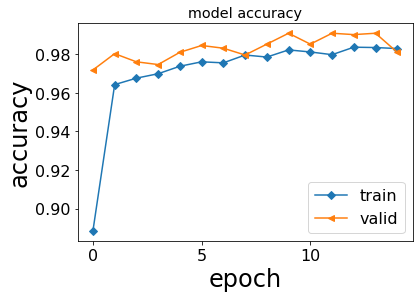

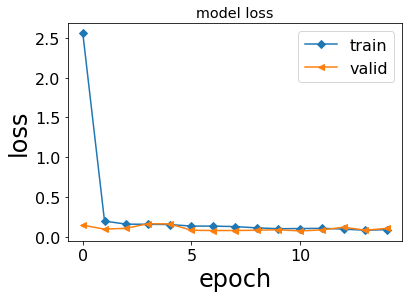

95/95 [==============================] - 0s 563us/step - loss: 0.1143 - accuracy: 0.9737

loss: 0.114

accuracy: 0.974
4/4 [==============================] - 0s 798us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 82},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3},
 '2': {'precision': 0.9,
  'recall': 1.0,
  'f1-score': 0.9473684210526316,
  'support': 9},
 '3': {'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1-score': 0.9090909090909091,
  'support': 6},
 'accuracy': 0.99,
 'macro avg': {'precision': 0.975,
  'recall': 0.9583333333333334,
  'f1-score': 0.9641148325358853,
  'support': 100},
 'weighted avg': {'precision': 0.991,
  'recall': 0.99,
  'f1-score': 0.9898086124401914,
  'support': 100}}

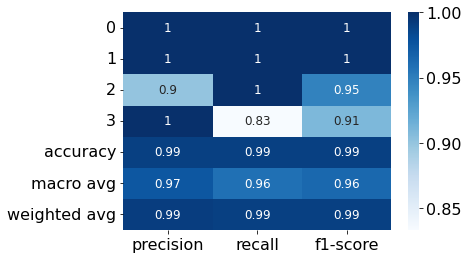

array([[82,  0,  0,  0],
       [ 0,  3,  0,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  1,  5]])

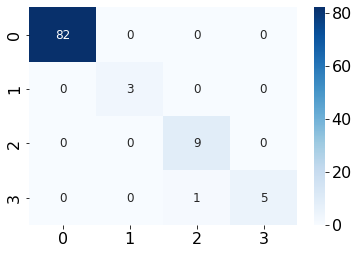

({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 82},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3},
  '2': {'precision': 0.9,
   'recall': 1.0,
   'f1-score': 0.9473684210526316,
   'support': 9},
  '3': {'precision': 1.0,
   'recall': 0.8333333333333334,
   'f1-score': 0.9090909090909091,
   'support': 6},
  'accuracy': 0.99,
  'macro avg': {'precision': 0.975,
   'recall': 0.9583333333333334,
   'f1-score': 0.9641148325358853,
   'support': 100},
  'weighted avg': {'precision': 0.991,
   'recall': 0.99,
   'f1-score': 0.9898086124401914,
   'support': 100}},
 array([[82,  0,  0,  0],
        [ 0,  3,  0,  0],
        [ 0,  0,  9,  0],
        [ 0,  0,  1,  5]]))

In [39]:
NN_Model_Prediction(org_train_x,org_test_x,org_train_y,org_test_y,len(org_train_frame_x.columns),
                    dense_in_dim = len(org_train_frame_x.columns),dense_hid_dim = 8,num_of_hid_layer=0,
                    hid_lay_act = 'relu',dense_out_dim = 4,out_lay_act='softmax', eva_metrics=['accuracy'],
                    opt='adam',loss='categorical_crossentropy',val_split=0.20,epoch=15,batch_size=5,
                    te_size=100)

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 746us/step - loss: 7.8945 - accuracy: 0.8923 - val_loss: 0.3409 - val_accuracy: 0.9563
Epoch 2/15
1135/1135 [==============================] - 1s 670us/step - loss: 0.2620 - accuracy: 0.9633 - val_loss: 0.1190 - val_accuracy: 0.9774
Epoch 3/15
1135/1135 [==============================] - 1s 684us/step - loss: 0.1734 - accuracy: 0.9699 - val_loss: 0.1878 - val_accuracy: 0.9753
Epoch 4/15
1135/1135 [==============================] - 1s 669us/step - loss: 0.1739 - accuracy: 0.9744 - val_loss: 0.2487 - val_accuracy: 0.9422
Epoch 5/15
1135/1135 [==============================] - 1s 673us/step - loss: 0.1422 - accuracy: 0.9773 - val_loss: 0.1160 - val_accuracy: 0.9838
Epoch 6/15
1135/1135 [==============================] - 1s 675us/step - loss: 0.1428 - accuracy: 0.9778 - val_loss: 0.1982 - val_accuracy: 0.9506
Epoch 7/15
1135/1135 [==============================] - 1s 673us/step - loss: 0.1202 - accuracy: 0.9818 - val_loss: 0.1032 - val_accura

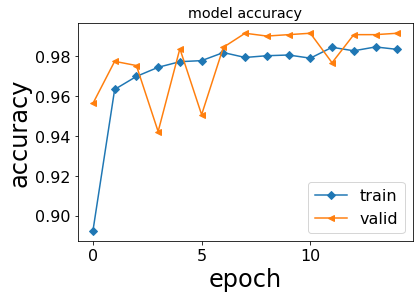

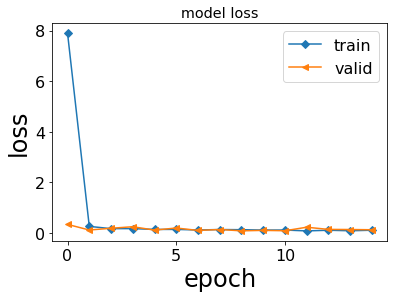

95/95 [==============================] - 0s 529us/step - loss: 0.1072 - accuracy: 0.9872

loss: 0.107

accuracy: 0.987
4/4 [==============================] - 0s 757us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 68},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 '2': {'precision': 1.0,
  'recall': 0.9090909090909091,
  'f1-score': 0.9523809523809523,
  'support': 11},
 '3': {'precision': 0.9333333333333333,
  'recall': 1.0,
  'f1-score': 0.9655172413793104,
  'support': 14},
 'accuracy': 0.99,
 'macro avg': {'precision': 0.9833333333333334,
  'recall': 0.9772727272727273,
  'f1-score': 0.9794745484400658,
  'support': 100},
 'weighted avg': {'precision': 0.9906666666666666,
  'recall': 0.99,
  'f1-score': 0.9899343185550084,
  'support': 100}}

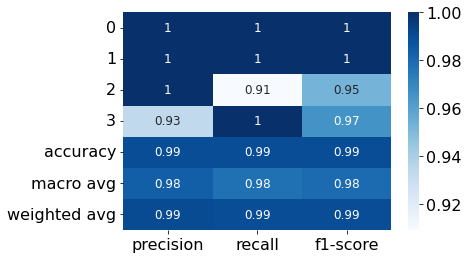

array([[68,  0,  0,  0],
       [ 0,  7,  0,  0],
       [ 0,  0, 10,  1],
       [ 0,  0,  0, 14]])

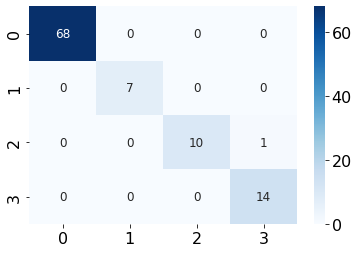

Epoch 1/15
   1/1135 [..............................] - ETA: 2:53 - loss: 105.6832 - accuracy: 0.2000

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 730us/step - loss: 4.4090 - accuracy: 0.8583 - val_loss: 0.5309 - val_accuracy: 0.9520
Epoch 2/15
1135/1135 [==============================] - 1s 662us/step - loss: 0.5253 - accuracy: 0.9418 - val_loss: 0.2527 - val_accuracy: 0.9774
Epoch 3/15
1135/1135 [==============================] - 1s 657us/step - loss: 0.2935 - accuracy: 0.9579 - val_loss: 0.1755 - val_accuracy: 0.9767
Epoch 4/15
1135/1135 [==============================] - 1s 665us/step - loss: 0.2563 - accuracy: 0.9628 - val_loss: 0.1492 - val_accuracy: 0.9788
Epoch 5/15
1135/1135 [==============================] - 1s 684us/step - loss: 0.1990 - accuracy: 0.9686 - val_loss: 0.1481 - val_accuracy: 0.9803
Epoch 6/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.1790 - accuracy: 0.9707 - val_loss: 0.2611 - val_accuracy: 0.9365
Epoch 7/15
1135/1135 [==============================] - 1s 657us/step - loss: 0.1784 - accuracy: 0.9704 - val_loss: 0.1897 - val_accura

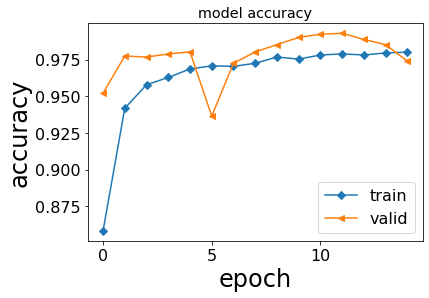

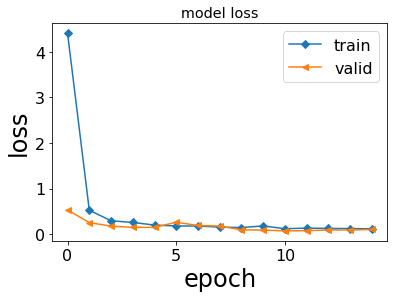

95/95 [==============================] - 0s 736us/step - loss: 0.1194 - accuracy: 0.9707

loss: 0.119

accuracy: 0.971
4/4 [==============================] - 0s 966us/step


{'0': {'precision': 0.9863013698630136,
  'recall': 1.0,
  'f1-score': 0.993103448275862,
  'support': 72},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6},
 '2': {'precision': 0.7058823529411765,
  'recall': 1.0,
  'f1-score': 0.8275862068965517,
  'support': 12},
 '3': {'precision': 1.0,
  'recall': 0.4,
  'f1-score': 0.5714285714285715,
  'support': 10},
 'accuracy': 0.94,
 'macro avg': {'precision': 0.9230459307010476,
  'recall': 0.85,
  'f1-score': 0.8480295566502464,
  'support': 100},
 'weighted avg': {'precision': 0.954842868654311,
  'recall': 0.94,
  'f1-score': 0.931487684729064,
  'support': 100}}

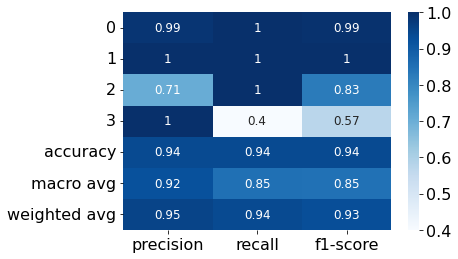

array([[72,  0,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  0, 12,  0],
       [ 1,  0,  5,  4]])

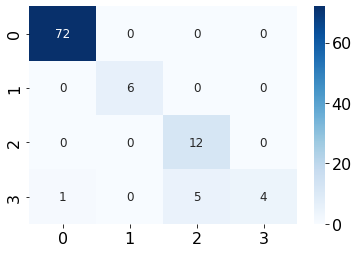

Epoch 1/15
   1/1135 [..............................] - ETA: 2:55 - loss: 204.5753 - accuracy: 0.4000

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 727us/step - loss: 3.8036 - accuracy: 0.9115 - val_loss: 0.2472 - val_accuracy: 0.9753
Epoch 2/15
1135/1135 [==============================] - 1s 657us/step - loss: 0.3694 - accuracy: 0.9543 - val_loss: 1.1420 - val_accuracy: 0.9316
Epoch 3/15
1135/1135 [==============================] - 1s 657us/step - loss: 0.2638 - accuracy: 0.9654 - val_loss: 0.2500 - val_accuracy: 0.9704
Epoch 4/15
1135/1135 [==============================] - 1s 660us/step - loss: 0.2126 - accuracy: 0.9753 - val_loss: 0.1373 - val_accuracy: 0.9845
Epoch 5/15
1135/1135 [==============================] - 1s 659us/step - loss: 0.2304 - accuracy: 0.9718 - val_loss: 0.0996 - val_accuracy: 0.9908
Epoch 6/15
1135/1135 [==============================] - 1s 660us/step - loss: 0.1994 - accuracy: 0.9790 - val_loss: 0.1225 - val_accuracy: 0.9774
Epoch 7/15
1135/1135 [==============================] - 1s 657us/step - loss: 0.2109 - accuracy: 0.9762 - val_loss: 0.0772 - val_accura

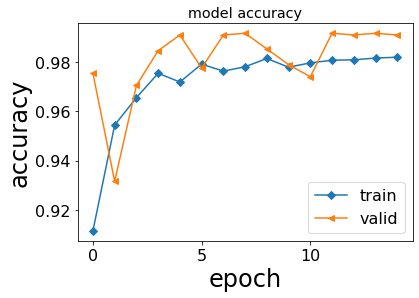

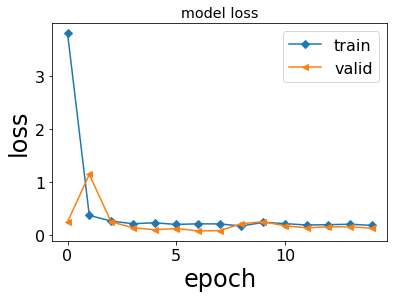

95/95 [==============================] - 0s 542us/step - loss: 0.1542 - accuracy: 0.9872

loss: 0.154

accuracy: 0.987
4/4 [==============================] - 0s 841us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 76},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6},
 '2': {'precision': 1.0,
  'recall': 0.8571428571428571,
  'f1-score': 0.923076923076923,
  'support': 14},
 '3': {'precision': 0.6666666666666666,
  'recall': 1.0,
  'f1-score': 0.8,
  'support': 4},
 'accuracy': 0.98,
 'macro avg': {'precision': 0.9166666666666666,
  'recall': 0.9642857142857143,
  'f1-score': 0.9307692307692308,
  'support': 100},
 'weighted avg': {'precision': 0.9866666666666667,
  'recall': 0.98,
  'f1-score': 0.9812307692307692,
  'support': 100}}

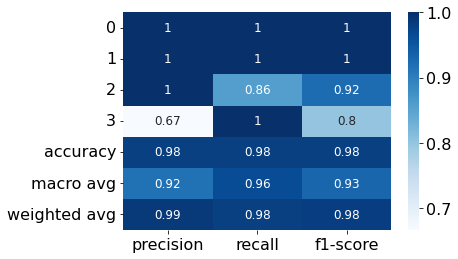

array([[76,  0,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  0, 12,  2],
       [ 0,  0,  0,  4]])

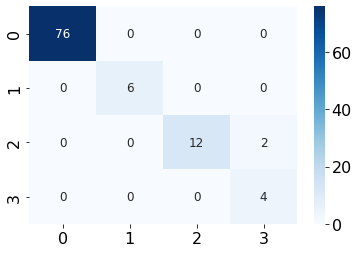

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 731us/step - loss: 4.1262 - accuracy: 0.8914 - val_loss: 0.3702 - val_accuracy: 0.9485
Epoch 2/15
1135/1135 [==============================] - 1s 663us/step - loss: 0.3040 - accuracy: 0.9586 - val_loss: 0.1470 - val_accuracy: 0.9781
Epoch 3/15
1135/1135 [==============================] - 1s 660us/step - loss: 0.1828 - accuracy: 0.9743 - val_loss: 0.4389 - val_accuracy: 0.9379
Epoch 4/15
1135/1135 [==============================] - 1s 666us/step - loss: 0.1702 - accuracy: 0.9748 - val_loss: 0.1576 - val_accuracy: 0.9810
Epoch 5/15
1135/1135 [==============================] - 1s 659us/step - loss: 0.1778 - accuracy: 0.9750 - val_loss: 0.0678 - val_accuracy: 0.9852
Epoch 6/15
1135/1135 [==============================] - 1s 665us/step - loss: 0.2240 - accuracy: 0.9753 - val_loss: 0.1295 - val_accuracy: 0.9908
Epoch 7/15
1135/1135 [==============================] - 1s 670us/step - loss: 0.2017 - accuracy: 0.9781 - val_loss: 0.1061 - val_accura

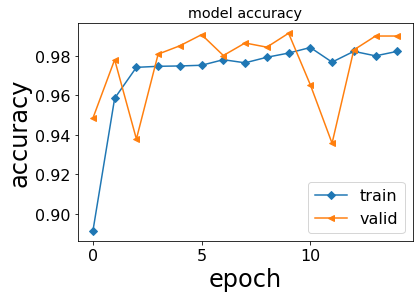

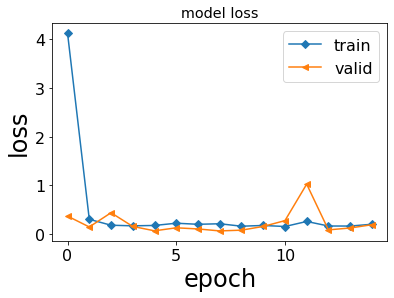

95/95 [==============================] - 0s 529us/step - loss: 0.2721 - accuracy: 0.9862

loss: 0.272

accuracy: 0.986
4/4 [==============================] - 0s 759us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 87},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1},
 '2': {'precision': 1.0,
  'recall': 0.75,
  'f1-score': 0.8571428571428571,
  'support': 4},
 '3': {'precision': 0.8888888888888888,
  'recall': 1.0,
  'f1-score': 0.9411764705882353,
  'support': 8},
 'accuracy': 0.99,
 'macro avg': {'precision': 0.9722222222222222,
  'recall': 0.9375,
  'f1-score': 0.9495798319327731,
  'support': 100},
 'weighted avg': {'precision': 0.9911111111111112,
  'recall': 0.99,
  'f1-score': 0.9895798319327731,
  'support': 100}}

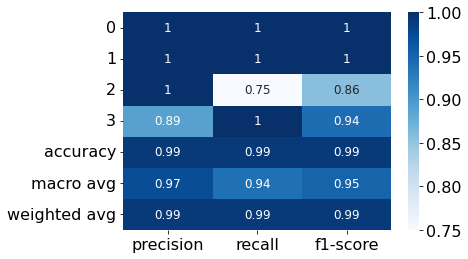

array([[87,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  3,  1],
       [ 0,  0,  0,  8]])

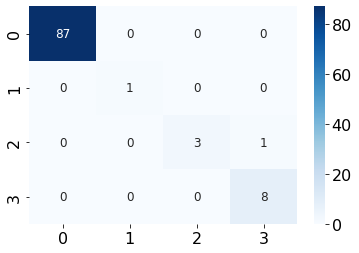

Epoch 1/15
   1/1135 [..............................] - ETA: 2:54 - loss: 89.5123 - accuracy: 0.0000e+00

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 731us/step - loss: 5.7040 - accuracy: 0.8447 - val_loss: 0.3400 - val_accuracy: 0.9506
Epoch 2/15
1135/1135 [==============================] - 1s 658us/step - loss: 0.4369 - accuracy: 0.9415 - val_loss: 0.1349 - val_accuracy: 0.9732
Epoch 3/15
1135/1135 [==============================] - 1s 663us/step - loss: 0.2206 - accuracy: 0.9605 - val_loss: 0.0873 - val_accuracy: 0.9831
Epoch 4/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.1604 - accuracy: 0.9718 - val_loss: 0.8969 - val_accuracy: 0.9231
Epoch 5/15
1135/1135 [==============================] - 1s 663us/step - loss: 0.1698 - accuracy: 0.9725 - val_loss: 0.0492 - val_accuracy: 0.9922
Epoch 6/15
1135/1135 [==============================] - 1s 662us/step - loss: 0.2316 - accuracy: 0.9720 - val_loss: 0.1263 - val_accuracy: 0.9654
Epoch 7/15
1135/1135 [==============================] - 1s 667us/step - loss: 0.1832 - accuracy: 0.9790 - val_loss: 0.1318 - val_accura

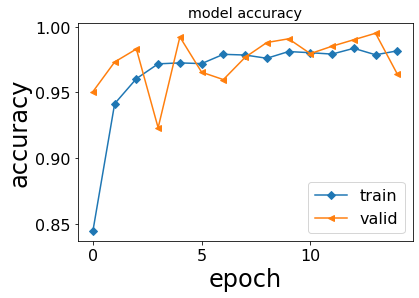

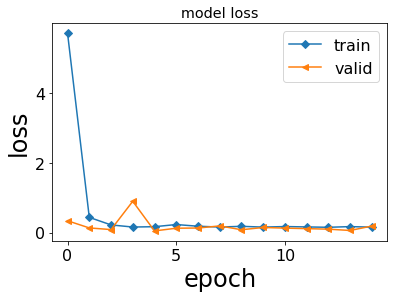

95/95 [==============================] - 0s 523us/step - loss: 0.2048 - accuracy: 0.9615

loss: 0.205

accuracy: 0.962
4/4 [==============================] - 0s 918us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 84},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 '2': {'precision': 0.625,
  'recall': 1.0,
  'f1-score': 0.7692307692307693,
  'support': 5},
 '3': {'precision': 1.0,
  'recall': 0.5,
  'f1-score': 0.6666666666666666,
  'support': 6},
 'accuracy': 0.97,
 'macro avg': {'precision': 0.90625,
  'recall': 0.875,
  'f1-score': 0.8589743589743589,
  'support': 100},
 'weighted avg': {'precision': 0.98125,
  'recall': 0.97,
  'f1-score': 0.9684615384615384,
  'support': 100}}

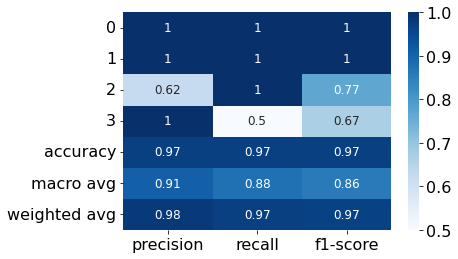

array([[84,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0,  5,  0],
       [ 0,  0,  3,  3]])

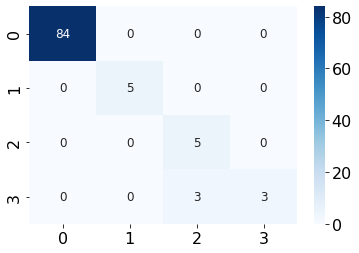

Epoch 1/15
   1/1135 [..............................] - ETA: 2:56 - loss: 42.0054 - accuracy: 0.6000

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 729us/step - loss: 2.0176 - accuracy: 0.9027 - val_loss: 0.4594 - val_accuracy: 0.9288
Epoch 2/15
1135/1135 [==============================] - 1s 662us/step - loss: 0.2402 - accuracy: 0.9565 - val_loss: 0.1236 - val_accuracy: 0.9810
Epoch 3/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.2148 - accuracy: 0.9677 - val_loss: 0.0998 - val_accuracy: 0.9859
Epoch 4/15
1135/1135 [==============================] - 1s 671us/step - loss: 0.1943 - accuracy: 0.9690 - val_loss: 0.0755 - val_accuracy: 0.9838
Epoch 5/15
1135/1135 [==============================] - 1s 663us/step - loss: 0.1633 - accuracy: 0.9744 - val_loss: 0.1093 - val_accuracy: 0.9824
Epoch 6/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.2054 - accuracy: 0.9721 - val_loss: 0.0848 - val_accuracy: 0.9831
Epoch 7/15
1135/1135 [==============================] - 1s 663us/step - loss: 0.2006 - accuracy: 0.9751 - val_loss: 0.1320 - val_accura

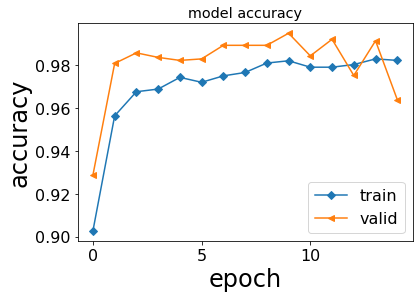

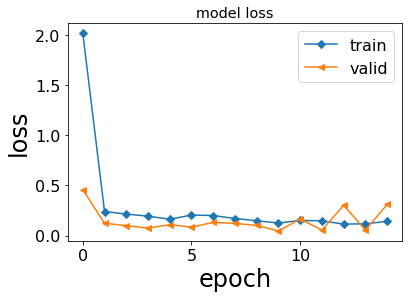

95/95 [==============================] - 0s 563us/step - loss: 0.4600 - accuracy: 0.9582

loss: 0.460

accuracy: 0.958
4/4 [==============================] - 0s 848us/step


{'0': {'precision': 0.9873417721518988,
  'recall': 1.0,
  'f1-score': 0.9936305732484078,
  'support': 78},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 '2': {'precision': 1.0,
  'recall': 0.3333333333333333,
  'f1-score': 0.5,
  'support': 9},
 '3': {'precision': 0.45454545454545453,
  'recall': 0.8333333333333334,
  'f1-score': 0.5882352941176471,
  'support': 6},
 'accuracy': 0.93,
 'macro avg': {'precision': 0.8604718066743383,
  'recall': 0.7916666666666667,
  'f1-score': 0.7704664668415138,
  'support': 100},
 'weighted avg': {'precision': 0.9573993095512084,
  'recall': 0.93,
  'f1-score': 0.9253259647808169,
  'support': 100}}

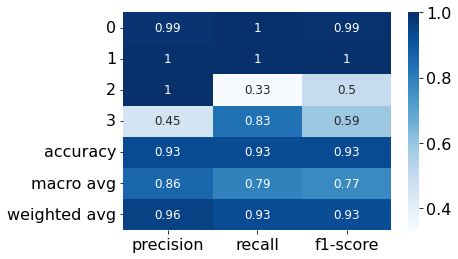

array([[78,  0,  0,  0],
       [ 0,  7,  0,  0],
       [ 0,  0,  3,  6],
       [ 1,  0,  0,  5]])

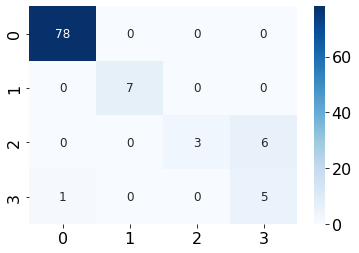

Epoch 1/15
   1/1135 [..............................] - ETA: 2:56 - loss: 18.8383 - accuracy: 0.4000

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 796us/step - loss: 2.0231 - accuracy: 0.8755 - val_loss: 0.7538 - val_accuracy: 0.8738
Epoch 2/15
1135/1135 [==============================] - 1s 717us/step - loss: 0.3940 - accuracy: 0.9423 - val_loss: 0.2985 - val_accuracy: 0.9436
Epoch 3/15
1135/1135 [==============================] - 1s 721us/step - loss: 0.3138 - accuracy: 0.9524 - val_loss: 0.1436 - val_accuracy: 0.9676
Epoch 4/15
1135/1135 [==============================] - 1s 684us/step - loss: 0.2587 - accuracy: 0.9635 - val_loss: 0.1737 - val_accuracy: 0.9810
Epoch 5/15
1135/1135 [==============================] - 1s 682us/step - loss: 0.1895 - accuracy: 0.9728 - val_loss: 0.0974 - val_accuracy: 0.9633
Epoch 6/15
1135/1135 [==============================] - 1s 740us/step - loss: 0.2454 - accuracy: 0.9695 - val_loss: 0.2490 - val_accuracy: 0.9598
Epoch 7/15
1135/1135 [==============================] - 1s 687us/step - loss: 0.2033 - accuracy: 0.9702 - val_loss: 0.1037 - val_accura

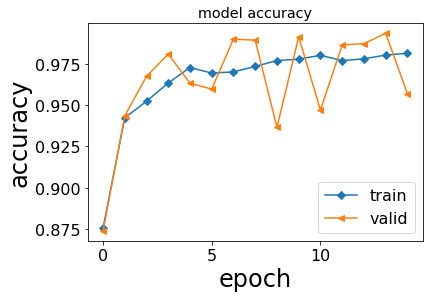

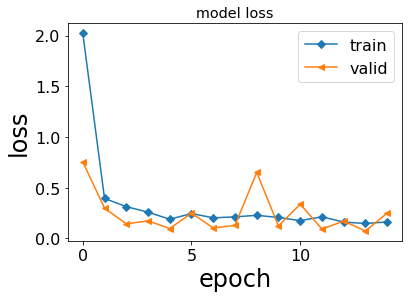

95/95 [==============================] - 0s 579us/step - loss: 0.2665 - accuracy: 0.9546

loss: 0.266

accuracy: 0.955
4/4 [==============================] - 0s 841us/step


{'0': {'precision': 0.9764705882352941,
  'recall': 1.0,
  'f1-score': 0.988095238095238,
  'support': 83},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3},
 '2': {'precision': 0.5555555555555556,
  'recall': 1.0,
  'f1-score': 0.7142857142857143,
  'support': 5},
 '3': {'precision': 1.0,
  'recall': 0.3333333333333333,
  'f1-score': 0.5,
  'support': 9},
 'accuracy': 0.94,
 'macro avg': {'precision': 0.8830065359477124,
  'recall': 0.8333333333333334,
  'f1-score': 0.8005952380952381,
  'support': 100},
 'weighted avg': {'precision': 0.9582483660130718,
  'recall': 0.94,
  'f1-score': 0.9308333333333333,
  'support': 100}}

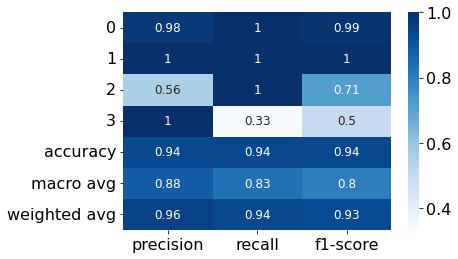

array([[83,  0,  0,  0],
       [ 0,  3,  0,  0],
       [ 0,  0,  5,  0],
       [ 2,  0,  4,  3]])

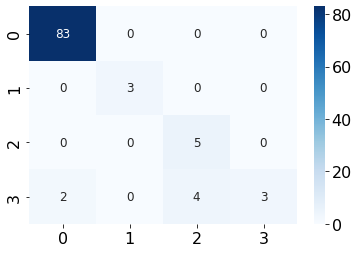

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 728us/step - loss: 4.4936 - accuracy: 0.8803 - val_loss: 0.1868 - val_accuracy: 0.9690
Epoch 2/15
1135/1135 [==============================] - 1s 665us/step - loss: 0.2769 - accuracy: 0.9563 - val_loss: 0.0842 - val_accuracy: 0.9817
Epoch 3/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.2342 - accuracy: 0.9667 - val_loss: 0.1354 - val_accuracy: 0.9774
Epoch 4/15
1135/1135 [==============================] - 1s 660us/step - loss: 0.2623 - accuracy: 0.9677 - val_loss: 0.2025 - val_accuracy: 0.9760
Epoch 5/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.2006 - accuracy: 0.9766 - val_loss: 0.0781 - val_accuracy: 0.9845
Epoch 6/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.2226 - accuracy: 0.9755 - val_loss: 0.1192 - val_accuracy: 0.9647
Epoch 7/15
1135/1135 [==============================] - 1s 665us/step - loss: 0.2594 - accuracy: 0.9737 - val_loss: 0.1114 - val_accura

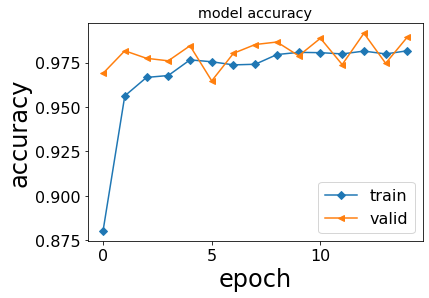

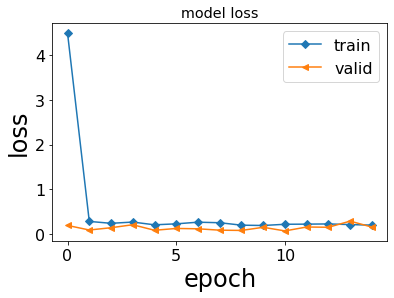

95/95 [==============================] - 0s 528us/step - loss: 0.2320 - accuracy: 0.9826

loss: 0.232

accuracy: 0.983
4/4 [==============================] - 0s 931us/step


{'0': {'precision': 0.9873417721518988,
  'recall': 1.0,
  'f1-score': 0.9936305732484078,
  'support': 78},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6},
 '2': {'precision': 1.0,
  'recall': 0.875,
  'f1-score': 0.9333333333333333,
  'support': 8},
 '3': {'precision': 0.875, 'recall': 0.875, 'f1-score': 0.875, 'support': 8},
 'accuracy': 0.98,
 'macro avg': {'precision': 0.9655854430379747,
  'recall': 0.9375,
  'f1-score': 0.9504909766454352,
  'support': 100},
 'weighted avg': {'precision': 0.980126582278481,
  'recall': 0.98,
  'f1-score': 0.9796985138004247,
  'support': 100}}

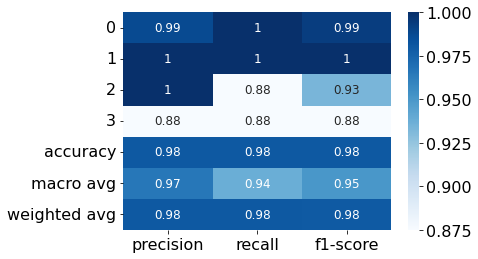

array([[78,  0,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  0,  7,  1],
       [ 1,  0,  0,  7]])

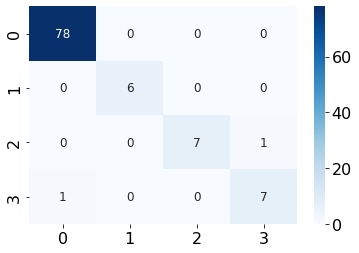

Epoch 1/15
   1/1135 [..............................] - ETA: 2:56 - loss: 216.4691 - accuracy: 0.0000e+00

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 737us/step - loss: 9.5116 - accuracy: 0.8138 - val_loss: 0.1573 - val_accuracy: 0.9711
Epoch 2/15
1135/1135 [==============================] - 1s 668us/step - loss: 0.2085 - accuracy: 0.9616 - val_loss: 0.1136 - val_accuracy: 0.9810
Epoch 3/15
1135/1135 [==============================] - 1s 668us/step - loss: 0.1531 - accuracy: 0.9734 - val_loss: 0.0669 - val_accuracy: 0.9852
Epoch 4/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.1454 - accuracy: 0.9730 - val_loss: 0.1968 - val_accuracy: 0.9704
Epoch 5/15
1135/1135 [==============================] - 1s 671us/step - loss: 0.1390 - accuracy: 0.9746 - val_loss: 0.0748 - val_accuracy: 0.9866
Epoch 6/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.1084 - accuracy: 0.9806 - val_loss: 0.0549 - val_accuracy: 0.9951
Epoch 7/15
1135/1135 [==============================] - 1s 663us/step - loss: 0.1570 - accuracy: 0.9774 - val_loss: 0.0682 - val_accura

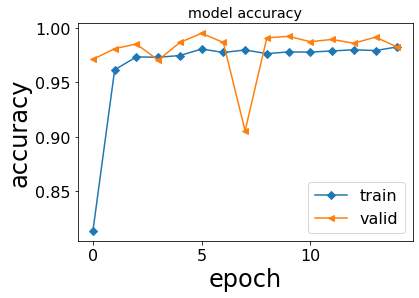

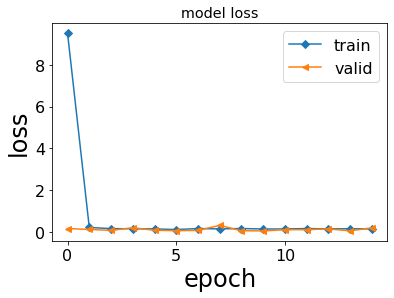

95/95 [==============================] - 0s 543us/step - loss: 0.2748 - accuracy: 0.9799

loss: 0.275

accuracy: 0.980
4/4 [==============================] - 0s 853us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 87},
 '1': {'precision': 1.0,
  'recall': 0.6666666666666666,
  'f1-score': 0.8,
  'support': 3},
 '2': {'precision': 0.75,
  'recall': 0.6,
  'f1-score': 0.6666666666666665,
  'support': 5},
 '3': {'precision': 0.7142857142857143,
  'recall': 1.0,
  'f1-score': 0.8333333333333333,
  'support': 5},
 'accuracy': 0.97,
 'macro avg': {'precision': 0.8660714285714286,
  'recall': 0.8166666666666667,
  'f1-score': 0.825,
  'support': 100},
 'weighted avg': {'precision': 0.9732142857142857,
  'recall': 0.97,
  'f1-score': 0.9690000000000001,
  'support': 100}}

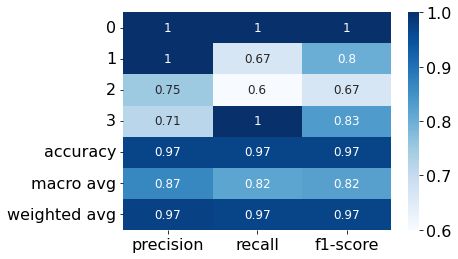

array([[87,  0,  0,  0],
       [ 0,  2,  1,  0],
       [ 0,  0,  3,  2],
       [ 0,  0,  0,  5]])

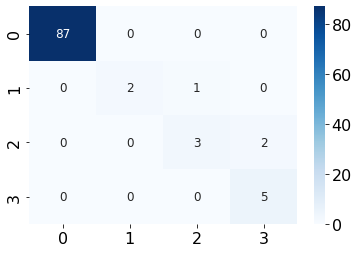

Epoch 1/15
   1/1135 [..............................] - ETA: 2:59 - loss: 213.7422 - accuracy: 0.0000e+00

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 731us/step - loss: 7.2123 - accuracy: 0.8392 - val_loss: 0.1727 - val_accuracy: 0.9598
Epoch 2/15
1135/1135 [==============================] - 1s 669us/step - loss: 0.1416 - accuracy: 0.9674 - val_loss: 0.0656 - val_accuracy: 0.9810
Epoch 3/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.1439 - accuracy: 0.9716 - val_loss: 0.0540 - val_accuracy: 0.9866
Epoch 4/15
1135/1135 [==============================] - 1s 666us/step - loss: 0.1335 - accuracy: 0.9725 - val_loss: 0.1023 - val_accuracy: 0.9697
Epoch 5/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.1489 - accuracy: 0.9744 - val_loss: 0.0926 - val_accuracy: 0.9866
Epoch 6/15
1135/1135 [==============================] - 1s 668us/step - loss: 0.1177 - accuracy: 0.9795 - val_loss: 0.0888 - val_accuracy: 0.9824
Epoch 7/15
1135/1135 [==============================] - 1s 665us/step - loss: 0.1572 - accuracy: 0.9780 - val_loss: 0.0656 - val_accura

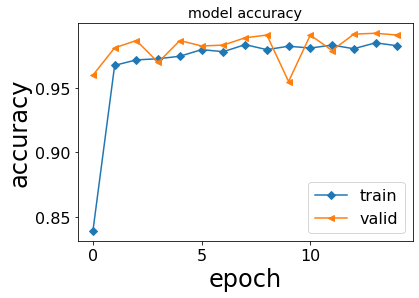

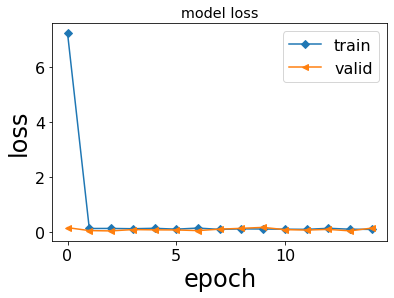

95/95 [==============================] - 0s 626us/step - loss: 0.2203 - accuracy: 0.9872

loss: 0.220

accuracy: 0.987
4/4 [==============================] - 0s 987us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 81},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3},
 '2': {'precision': 1.0,
  'recall': 0.7142857142857143,
  'f1-score': 0.8333333333333333,
  'support': 7},
 '3': {'precision': 0.8181818181818182,
  'recall': 1.0,
  'f1-score': 0.9,
  'support': 9},
 'accuracy': 0.98,
 'macro avg': {'precision': 0.9545454545454546,
  'recall': 0.9285714285714286,
  'f1-score': 0.9333333333333332,
  'support': 100},
 'weighted avg': {'precision': 0.9836363636363636,
  'recall': 0.98,
  'f1-score': 0.9793333333333333,
  'support': 100}}

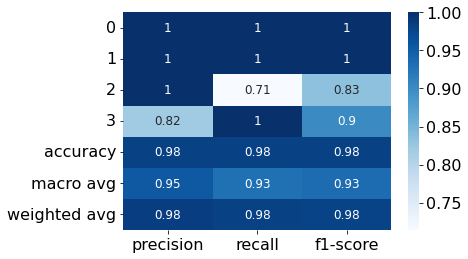

array([[81,  0,  0,  0],
       [ 0,  3,  0,  0],
       [ 0,  0,  5,  2],
       [ 0,  0,  0,  9]])

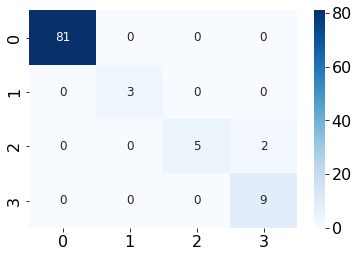

In [19]:
perfomance_array = []
confusion_arrary = []
# print(org_test_x)

for i in range(0,10):
    room_estimation_performance_report,conf_matrix = NN_Model_Prediction(org_train_x,org_test_x,org_train_y,org_test_y,len(org_train_frame_x.columns),
                    dense_in_dim = len(org_train_frame_x.columns),dense_hid_dim = 8,num_of_hid_layer=0, hid_lay_act = 'relu',
                        dense_out_dim = 4,out_lay_act='softmax', eva_metrics=['accuracy'],
                        opt='adam',loss='categorical_crossentropy',val_split=0.20,epoch=15,batch_size=5,te_size=100)
    
    perfomance_array.append(room_estimation_performance_report)
    confusion_arrary.append(conf_matrix)
    

In [4]:
accuracy =  [0.987,0.971,0.987,0.986,0.962,0.958, 0.955,0.983,0.980,0.987]
mean_acc = np.mean(accuracy)
std_acc = np.std(accuracy)


In [5]:
mean_acc,std_acc

(0.9756, 0.012297967311714578)

In [27]:
# print(perfomance_array)
performance_summary = []
for item in perfomance_array:
    performance_summary.append(item['macro avg'])
# print(perfomance_frame)
    

In [34]:
perfomance_frame = pd.DataFrame(performance_summary)
print(perfomance_frame['precision'].mean(),perfomance_frame['precision'].std())
print(perfomance_frame['recall'].mean(),perfomance_frame['recall'].std())
print(perfomance_frame['f1-score'].mean(),perfomance_frame['f1-score'].std())
types = [precision', 'recall', 'f1-score']
x_pos = np.arange(len(types))
CTEs = [perfomance_frame['precision'].mean(), perfomance_frame['recall'].mean(), perfomance_frame['f1-score'].mean()]
error = [perfomance_frame['precision'].std(), perfomance_frame['recall'].std(), perfomance_frame['f1-score'].std()]


0.923119882170018 0.04464952445757625
0.8911796536796537 0.06600047885339212
0.8846713541682195 0.07280198276842138


In [8]:
types = ['Accuracy','Precision', 'Recall', 'F1-score']
x_pos = np.arange(len(types))
CTEs = [0.9756, 0.923119882170018, 0.8911796536796537, 0.8846713541682195]
error = [0.012297967311714578,0.04464952445757625, 0.06600047885339212,0.07280198276842138]


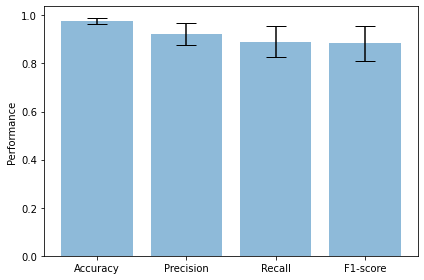

In [9]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Performance')
ax.set_xticks(x_pos)
ax.set_xticklabels(types)
# ax.set_title('Error Bar NN')
# ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('NN_error_bar.png')
plt.show()


# Normalized Data

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 739us/step - loss: 0.3639 - accuracy: 0.8623 - val_loss: 0.1450 - val_accuracy: 0.9499
Epoch 2/15
1135/1135 [==============================] - 1s 701us/step - loss: 0.0998 - accuracy: 0.9739 - val_loss: 0.0680 - val_accuracy: 0.9824
Epoch 3/15
1135/1135 [==============================] - 1s 705us/step - loss: 0.0537 - accuracy: 0.9866 - val_loss: 0.0441 - val_accuracy: 0.9873
Epoch 4/15
1135/1135 [==============================] - 1s 728us/step - loss: 0.0366 - accuracy: 0.9898 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 5/15
1135/1135 [==============================] - 1s 712us/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0316 - val_accuracy: 0.9915
Epoch 6/15
1135/1135 [==============================] - 1s 721us/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.0283 - val_accuracy: 0.9937
Epoch 7/15
1135/1135 [==============================] - 1s 688us/step - loss: 0.0215 - accuracy: 0.9914 - val_loss: 0.0269 - val_accura

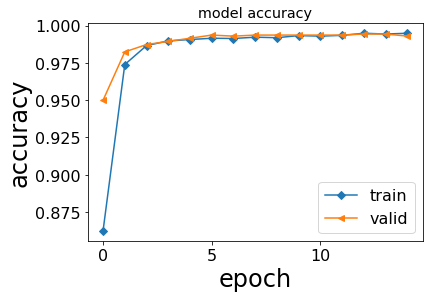

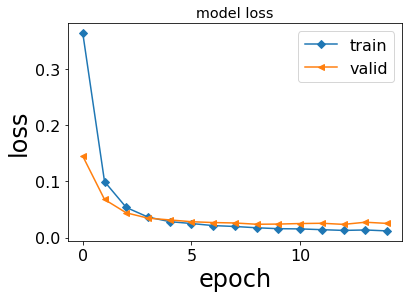

95/95 [==============================] - 0s 565us/step - loss: 0.0210 - accuracy: 0.9937

loss: 0.021

accuracy: 0.994
4/4 [==============================] - 0s 869us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 79},
 '1': {'precision': 1.0,
  'recall': 0.875,
  'f1-score': 0.9333333333333333,
  'support': 8},
 '2': {'precision': 0.8888888888888888,
  'recall': 1.0,
  'f1-score': 0.9411764705882353,
  'support': 8},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 'accuracy': 0.99,
 'macro avg': {'precision': 0.9722222222222222,
  'recall': 0.96875,
  'f1-score': 0.9686274509803922,
  'support': 100},
 'weighted avg': {'precision': 0.9911111111111112,
  'recall': 0.99,
  'f1-score': 0.9899607843137255,
  'support': 100}}

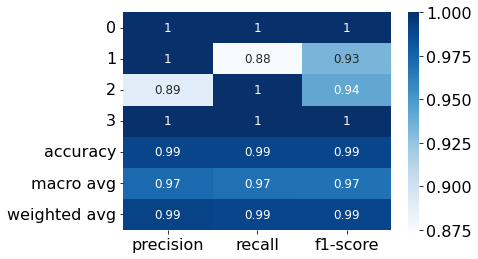

array([[79,  0,  0,  0],
       [ 0,  7,  1,  0],
       [ 0,  0,  8,  0],
       [ 0,  0,  0,  5]])

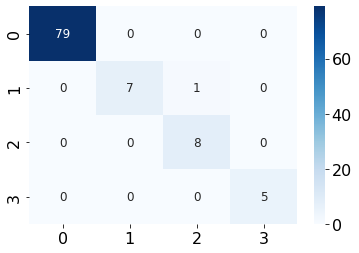

({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 79},
  '1': {'precision': 1.0,
   'recall': 0.875,
   'f1-score': 0.9333333333333333,
   'support': 8},
  '2': {'precision': 0.8888888888888888,
   'recall': 1.0,
   'f1-score': 0.9411764705882353,
   'support': 8},
  '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
  'accuracy': 0.99,
  'macro avg': {'precision': 0.9722222222222222,
   'recall': 0.96875,
   'f1-score': 0.9686274509803922,
   'support': 100},
  'weighted avg': {'precision': 0.9911111111111112,
   'recall': 0.99,
   'f1-score': 0.9899607843137255,
   'support': 100}},
 array([[79,  0,  0,  0],
        [ 0,  7,  1,  0],
        [ 0,  0,  8,  0],
        [ 0,  0,  0,  5]]))

In [40]:
NN_Model_Prediction(mNorm_train_x,mNorm_test_x,mNorm_train_y,mNorm_test_y,len(mNorm_train_frame_x.columns),
                    dense_in_dim = len(mNorm_train_frame_x.columns),dense_hid_dim = 8,num_of_hid_layer=0, hid_lay_act = 'relu',
                        dense_out_dim = 4,out_lay_act='softmax', eva_metrics=['accuracy'],
                        opt='adam',loss='categorical_crossentropy',val_split=0.20,epoch=15,batch_size=5,te_size=100)

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 745us/step - loss: 0.3287 - accuracy: 0.8806 - val_loss: 0.1197 - val_accuracy: 0.9542
Epoch 2/15
1135/1135 [==============================] - 1s 676us/step - loss: 0.0978 - accuracy: 0.9681 - val_loss: 0.0737 - val_accuracy: 0.9810
Epoch 3/15
1135/1135 [==============================] - 1s 682us/step - loss: 0.0627 - accuracy: 0.9820 - val_loss: 0.0552 - val_accuracy: 0.9852
Epoch 4/15
1135/1135 [==============================] - 1s 702us/step - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 5/15
1135/1135 [==============================] - 1s 704us/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0401 - val_accuracy: 0.9901
Epoch 6/15
1135/1135 [==============================] - 1s 692us/step - loss: 0.0320 - accuracy: 0.9884 - val_loss: 0.0319 - val_accuracy: 0.9908
Epoch 7/15
1135/1135 [==============================] - 1s 674us/step - loss: 0.0283 - accuracy: 0.9891 - val_loss: 0.0366 - val_accura

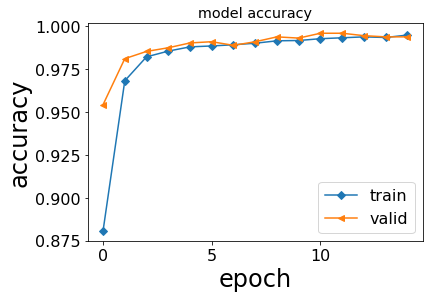

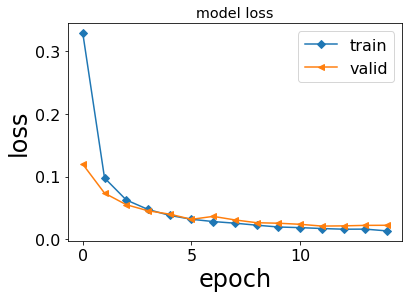

95/95 [==============================] - 0s 544us/step - loss: 0.0180 - accuracy: 0.9921

loss: 0.018

accuracy: 0.992
4/4 [==============================] - 0s 812us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 74},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6},
 '2': {'precision': 0.8888888888888888,
  'recall': 1.0,
  'f1-score': 0.9411764705882353,
  'support': 8},
 '3': {'precision': 1.0,
  'recall': 0.9166666666666666,
  'f1-score': 0.9565217391304348,
  'support': 12},
 'accuracy': 0.99,
 'macro avg': {'precision': 0.9722222222222222,
  'recall': 0.9791666666666666,
  'f1-score': 0.9744245524296675,
  'support': 100},
 'weighted avg': {'precision': 0.9911111111111112,
  'recall': 0.99,
  'f1-score': 0.990076726342711,
  'support': 100}}

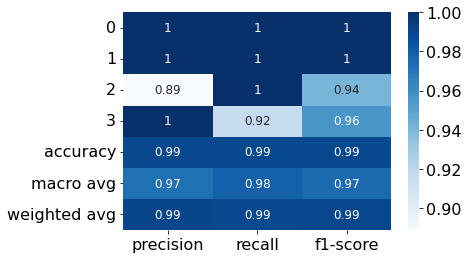

array([[74,  0,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  0,  8,  0],
       [ 0,  0,  1, 11]])

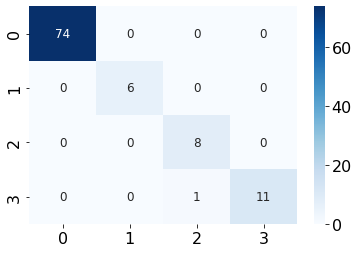

({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 74},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6},
  '2': {'precision': 0.8888888888888888,
   'recall': 1.0,
   'f1-score': 0.9411764705882353,
   'support': 8},
  '3': {'precision': 1.0,
   'recall': 0.9166666666666666,
   'f1-score': 0.9565217391304348,
   'support': 12},
  'accuracy': 0.99,
  'macro avg': {'precision': 0.9722222222222222,
   'recall': 0.9791666666666666,
   'f1-score': 0.9744245524296675,
   'support': 100},
  'weighted avg': {'precision': 0.9911111111111112,
   'recall': 0.99,
   'f1-score': 0.990076726342711,
   'support': 100}},
 array([[74,  0,  0,  0],
        [ 0,  6,  0,  0],
        [ 0,  0,  8,  0],
        [ 0,  0,  1, 11]]))

In [41]:
NN_Model_Prediction(zNorm_train_x,zNorm_test_x,zNorm_train_y,zNorm_test_y,len(zNorm_train_frame_x.columns),
                    dense_in_dim = len(zNorm_train_frame_x.columns),dense_hid_dim = 8,num_of_hid_layer=0, hid_lay_act = 'relu',
                        dense_out_dim = 4,out_lay_act='softmax', eva_metrics=['accuracy'],
                        opt='adam',loss='categorical_crossentropy',val_split=0.20,epoch=15,batch_size=5,te_size=100)

# Feature Representation with Z normalized 

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 728us/step - loss: 0.5273 - accuracy: 0.8348 - val_loss: 0.2027 - val_accuracy: 0.9274
Epoch 2/15
1135/1135 [==============================] - 1s 662us/step - loss: 0.1521 - accuracy: 0.9441 - val_loss: 0.0850 - val_accuracy: 0.9852
Epoch 3/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.0663 - accuracy: 0.9859 - val_loss: 0.0471 - val_accuracy: 0.9873
Epoch 4/15
1135/1135 [==============================] - 1s 658us/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0367 - val_accuracy: 0.9901
Epoch 5/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.0324 - accuracy: 0.9885 - val_loss: 0.0342 - val_accuracy: 0.9894
Epoch 6/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.0273 - accuracy: 0.9903 - val_loss: 0.0308 - val_accuracy: 0.9887
Epoch 7/15
1135/1135 [==============================] - 1s 665us/step - loss: 0.0241 - accuracy: 0.9910 - val_loss: 0.0301 - val_accura

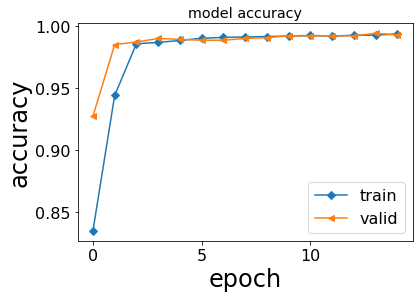

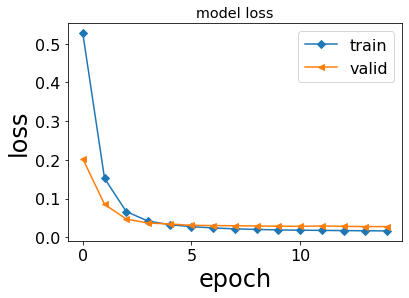

95/95 [==============================] - 0s 555us/step - loss: 0.0192 - accuracy: 0.9928

loss: 0.019

accuracy: 0.993
4/4 [==============================] - 0s 824us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 79},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 '2': {'precision': 1.0,
  'recall': 0.9090909090909091,
  'f1-score': 0.9523809523809523,
  'support': 11},
 '3': {'precision': 0.8333333333333334,
  'recall': 1.0,
  'f1-score': 0.9090909090909091,
  'support': 5},
 'accuracy': 0.99,
 'macro avg': {'precision': 0.9583333333333334,
  'recall': 0.9772727272727273,
  'f1-score': 0.9653679653679654,
  'support': 100},
 'weighted avg': {'precision': 0.9916666666666667,
  'recall': 0.99,
  'f1-score': 0.9902164502164503,
  'support': 100}}

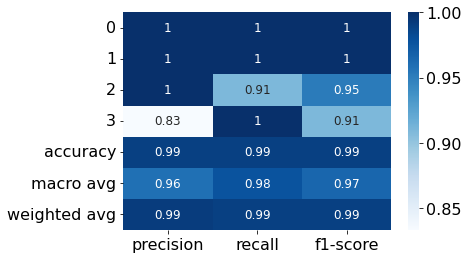

array([[79,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0, 10,  1],
       [ 0,  0,  0,  5]])

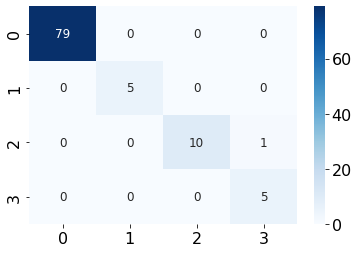

({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 79},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
  '2': {'precision': 1.0,
   'recall': 0.9090909090909091,
   'f1-score': 0.9523809523809523,
   'support': 11},
  '3': {'precision': 0.8333333333333334,
   'recall': 1.0,
   'f1-score': 0.9090909090909091,
   'support': 5},
  'accuracy': 0.99,
  'macro avg': {'precision': 0.9583333333333334,
   'recall': 0.9772727272727273,
   'f1-score': 0.9653679653679654,
   'support': 100},
  'weighted avg': {'precision': 0.9916666666666667,
   'recall': 0.99,
   'f1-score': 0.9902164502164503,
   'support': 100}},
 array([[79,  0,  0,  0],
        [ 0,  5,  0,  0],
        [ 0,  0, 10,  1],
        [ 0,  0,  0,  5]]))

In [42]:
NN_Model_Prediction(fa_train_x,fa_test_x,fa_train_y,fa_test_y,len(fa_train_frame_x.columns),
                    dense_in_dim = len(fa_train_frame_x.columns),dense_hid_dim = 8,num_of_hid_layer=0, hid_lay_act = 'relu',
                        dense_out_dim = 4,out_lay_act='softmax', eva_metrics=['accuracy'],
                        opt='adam',loss='categorical_crossentropy',val_split=0.20,epoch=15,batch_size=5,te_size=100)

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 735us/step - loss: 0.5085 - accuracy: 0.7618 - val_loss: 0.2890 - val_accuracy: 0.8265
Epoch 2/15
1135/1135 [==============================] - 1s 663us/step - loss: 0.2363 - accuracy: 0.8757 - val_loss: 0.1555 - val_accuracy: 0.9224
Epoch 3/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.1494 - accuracy: 0.9362 - val_loss: 0.1258 - val_accuracy: 0.9506
Epoch 4/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.1215 - accuracy: 0.9649 - val_loss: 0.1070 - val_accuracy: 0.9739
Epoch 5/15
1135/1135 [==============================] - 1s 658us/step - loss: 0.1019 - accuracy: 0.9774 - val_loss: 0.0924 - val_accuracy: 0.9831
Epoch 6/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.0869 - accuracy: 0.9841 - val_loss: 0.0824 - val_accuracy: 0.9873
Epoch 7/15
1135/1135 [==============================] - 1s 667us/step - loss: 0.0750 - accuracy: 0.9857 - val_loss: 0.0730 - val_accura

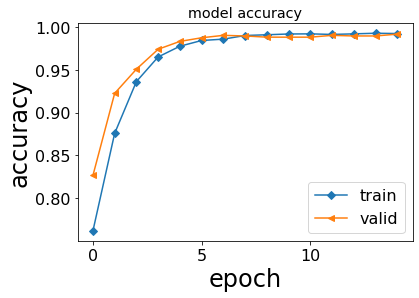

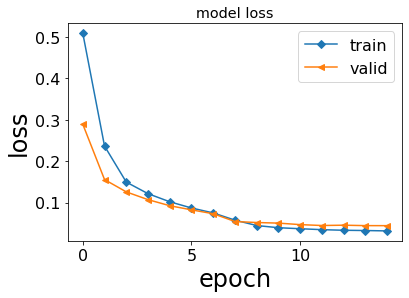

95/95 [==============================] - 0s 525us/step - loss: 0.0514 - accuracy: 0.9905

loss: 0.051

accuracy: 0.990
4/4 [==============================] - 0s 778us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 77},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 '2': {'precision': 1.0,
  'recall': 0.9090909090909091,
  'f1-score': 0.9523809523809523,
  'support': 11},
 '3': {'precision': 0.8333333333333334,
  'recall': 1.0,
  'f1-score': 0.9090909090909091,
  'support': 5},
 'accuracy': 0.99,
 'macro avg': {'precision': 0.9583333333333334,
  'recall': 0.9772727272727273,
  'f1-score': 0.9653679653679654,
  'support': 100},
 'weighted avg': {'precision': 0.9916666666666667,
  'recall': 0.99,
  'f1-score': 0.9902164502164503,
  'support': 100}}

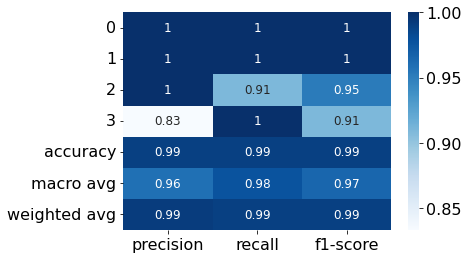

array([[77,  0,  0,  0],
       [ 0,  7,  0,  0],
       [ 0,  0, 10,  1],
       [ 0,  0,  0,  5]])

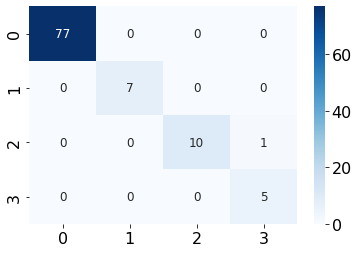

({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 77},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
  '2': {'precision': 1.0,
   'recall': 0.9090909090909091,
   'f1-score': 0.9523809523809523,
   'support': 11},
  '3': {'precision': 0.8333333333333334,
   'recall': 1.0,
   'f1-score': 0.9090909090909091,
   'support': 5},
  'accuracy': 0.99,
  'macro avg': {'precision': 0.9583333333333334,
   'recall': 0.9772727272727273,
   'f1-score': 0.9653679653679654,
   'support': 100},
  'weighted avg': {'precision': 0.9916666666666667,
   'recall': 0.99,
   'f1-score': 0.9902164502164503,
   'support': 100}},
 array([[77,  0,  0,  0],
        [ 0,  7,  0,  0],
        [ 0,  0, 10,  1],
        [ 0,  0,  0,  5]]))

In [43]:
NN_Model_Prediction(lda_train_x,lda_test_x,lda_train_y,lda_test_y,len(lda_train_frame_x.columns),
                    dense_in_dim = len(lda_train_frame_x.columns),dense_hid_dim = 8,num_of_hid_layer=0, hid_lay_act = 'relu',
                        dense_out_dim = 4,out_lay_act='softmax', eva_metrics=['accuracy'],
                        opt='adam',loss='categorical_crossentropy',val_split=0.20,epoch=15,batch_size=5,te_size=100)

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 734us/step - loss: 0.3625 - accuracy: 0.8671 - val_loss: 0.1982 - val_accuracy: 0.8865
Epoch 2/15
1135/1135 [==============================] - 1s 668us/step - loss: 0.1865 - accuracy: 0.9113 - val_loss: 0.1426 - val_accuracy: 0.9372
Epoch 3/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.1358 - accuracy: 0.9501 - val_loss: 0.1049 - val_accuracy: 0.9626
Epoch 4/15
1135/1135 [==============================] - 1s 669us/step - loss: 0.1037 - accuracy: 0.9684 - val_loss: 0.0815 - val_accuracy: 0.9746
Epoch 5/15
1135/1135 [==============================] - 1s 667us/step - loss: 0.0843 - accuracy: 0.9739 - val_loss: 0.0681 - val_accuracy: 0.9760
Epoch 6/15
1135/1135 [==============================] - 1s 665us/step - loss: 0.0706 - accuracy: 0.9790 - val_loss: 0.0586 - val_accuracy: 0.9788
Epoch 7/15
1135/1135 [==============================] - 1s 666us/step - loss: 0.0610 - accuracy: 0.9813 - val_loss: 0.0537 - val_accura

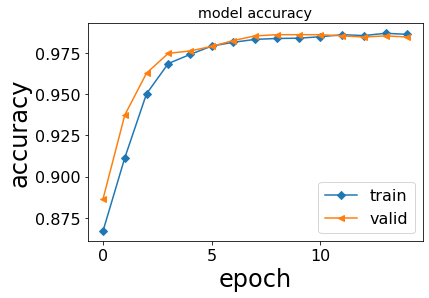

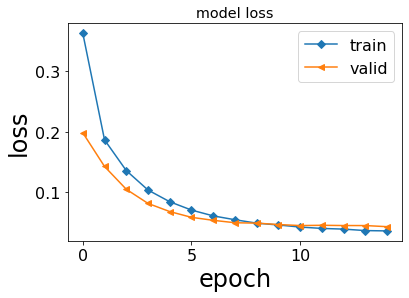

95/95 [==============================] - 0s 555us/step - loss: 0.0479 - accuracy: 0.9826

loss: 0.048

accuracy: 0.983
4/4 [==============================] - 0s 931us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 78},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4},
 '2': {'precision': 0.9166666666666666,
  'recall': 1.0,
  'f1-score': 0.9565217391304348,
  'support': 11},
 '3': {'precision': 1.0,
  'recall': 0.8571428571428571,
  'f1-score': 0.923076923076923,
  'support': 7},
 'accuracy': 0.99,
 'macro avg': {'precision': 0.9791666666666666,
  'recall': 0.9642857142857143,
  'f1-score': 0.9698996655518394,
  'support': 100},
 'weighted avg': {'precision': 0.9908333333333332,
  'recall': 0.99,
  'f1-score': 0.9898327759197325,
  'support': 100}}

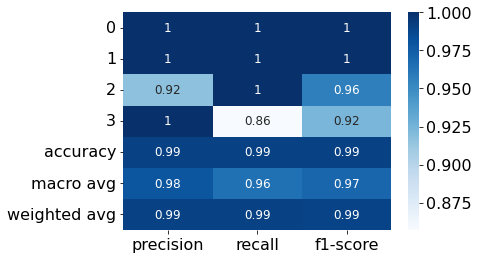

array([[78,  0,  0,  0],
       [ 0,  4,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  1,  6]])

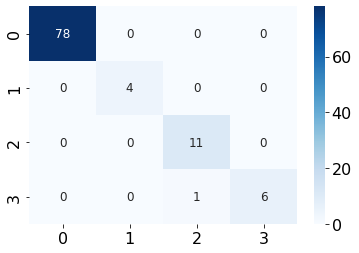

({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 78},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4},
  '2': {'precision': 0.9166666666666666,
   'recall': 1.0,
   'f1-score': 0.9565217391304348,
   'support': 11},
  '3': {'precision': 1.0,
   'recall': 0.8571428571428571,
   'f1-score': 0.923076923076923,
   'support': 7},
  'accuracy': 0.99,
  'macro avg': {'precision': 0.9791666666666666,
   'recall': 0.9642857142857143,
   'f1-score': 0.9698996655518394,
   'support': 100},
  'weighted avg': {'precision': 0.9908333333333332,
   'recall': 0.99,
   'f1-score': 0.9898327759197325,
   'support': 100}},
 array([[78,  0,  0,  0],
        [ 0,  4,  0,  0],
        [ 0,  0, 11,  0],
        [ 0,  0,  1,  6]]))

In [44]:
NN_Model_Prediction(pca_train_x,pca_test_x,pca_train_y,pca_test_y,len(pca_train_frame_x.columns),
                    dense_in_dim = len(pca_train_frame_x.columns),dense_hid_dim = 8,num_of_hid_layer=0, hid_lay_act = 'relu',
                        dense_out_dim = 4,out_lay_act='softmax', eva_metrics=['accuracy'],
                        opt='adam',loss='categorical_crossentropy',val_split=0.20,epoch=15,batch_size=5,te_size=100)

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1135/1135 [==============================] - 1s 730us/step - loss: 7.0204 - accuracy: 0.5652 - val_loss: 0.9401 - val_accuracy: 0.7750
Epoch 2/15
1135/1135 [==============================] - 1s 660us/step - loss: 0.6298 - accuracy: 0.7907 - val_loss: 0.5175 - val_accuracy: 0.8018
Epoch 3/15
1135/1135 [==============================] - 1s 656us/step - loss: 0.5385 - accuracy: 0.7934 - val_loss: 0.4933 - val_accuracy: 0.7934
Epoch 4/15
1135/1135 [==============================] - 1s 661us/step - loss: 0.5233 - accuracy: 0.7907 - val_loss: 0.4824 - val_accuracy: 0.8075
Epoch 5/15
1135/1135 [==============================] - 1s 666us/step - loss: 0.5131 - accuracy: 0.7953 - val_loss: 0.4830 - val_accuracy: 0.8152
Epoch 6/15
1135/1135 [==============================] - 1s 664us/step - loss: 0.5065 - accuracy: 0.8025 - val_loss: 0.4932 - val_accuracy: 0.8075
Epoch 7/15
1135/1135 [==============================] - 1s 663us/step - loss: 0.5040 - accuracy: 0.8071 - val_loss: 0.4699 - val_accura

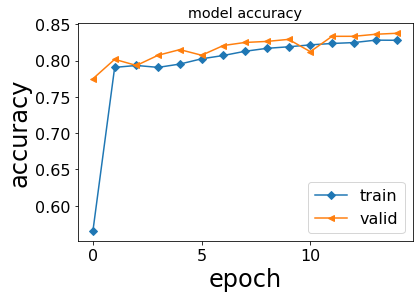

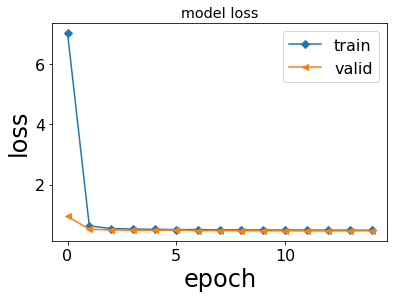

95/95 [==============================] - 0s 548us/step - loss: 0.4704 - accuracy: 0.8328

loss: 0.470

accuracy: 0.833
4/4 [==============================] - 0s 755us/step


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

{'0': {'precision': 0.8152173913043478,
  'recall': 0.9615384615384616,
  'f1-score': 0.8823529411764706,
  'support': 78},
 '1': {'precision': 0.5,
  'recall': 0.6666666666666666,
  'f1-score': 0.5714285714285715,
  'support': 6},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7},
 '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9},
 'accuracy': 0.79,
 'macro avg': {'precision': 0.3288043478260869,
  'recall': 0.40705128205128205,
  'f1-score': 0.36344537815126055,
  'support': 100},
 'weighted avg': {'precision': 0.6658695652173913,
  'recall': 0.79,
  'f1-score': 0.7225210084033614,
  'support': 100}}

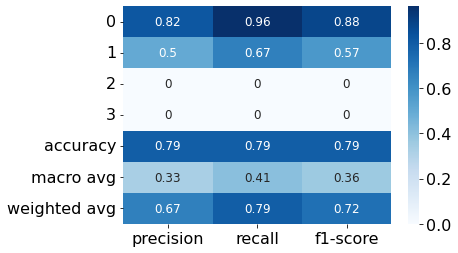

array([[75,  3,  0,  0],
       [ 2,  4,  0,  0],
       [ 7,  0,  0,  0],
       [ 8,  1,  0,  0]])

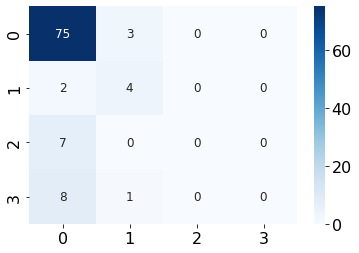

({'0': {'precision': 0.8152173913043478,
   'recall': 0.9615384615384616,
   'f1-score': 0.8823529411764706,
   'support': 78},
  '1': {'precision': 0.5,
   'recall': 0.6666666666666666,
   'f1-score': 0.5714285714285715,
   'support': 6},
  '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7},
  '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9},
  'accuracy': 0.79,
  'macro avg': {'precision': 0.3288043478260869,
   'recall': 0.40705128205128205,
   'f1-score': 0.36344537815126055,
   'support': 100},
  'weighted avg': {'precision': 0.6658695652173913,
   'recall': 0.79,
   'f1-score': 0.7225210084033614,
   'support': 100}},
 array([[75,  3,  0,  0],
        [ 2,  4,  0,  0],
        [ 7,  0,  0,  0],
        [ 8,  1,  0,  0]]))

In [45]:
NN_Model_Prediction(tsne_train_x,tsne_test_x,tsne_train_y,tsne_test_y,len(tsne_train_frame_x.columns),
                    dense_in_dim = len(tsne_train_frame_x.columns),dense_hid_dim = 8,num_of_hid_layer=0, hid_lay_act = 'relu',
                        dense_out_dim = 4,out_lay_act='softmax', eva_metrics=['accuracy'],
                        opt='adam',loss='categorical_crossentropy',val_split=0.20,epoch=15,batch_size=5,te_size=100)

In [54]:
seed = 7
np.random.seed(seed)
label_encoder = LabelEncoder()
def _Kfold_cross_validation(train_x,train_y,test_x,test_y,input_dim,test_size):
    y = Label_Encoding(train_y,label_encoder)
    test_y = Label_Encoding(test_y,label_encoder)
    # define 10-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    cvscores = []
    prec_score = []
    recall_score = []
    f1_score = []
    for train, test in kfold.split(train_x, train_y):
        model = Sequential()
        model.add(Dense(input_dim, input_dim=input_dim, activation='relu'))
        model.add(Dense(input_dim, activation='relu'))
        model.add(Dense(4, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
        # Fit the model
        model.fit(train_x[train], y[train], epochs=30, batch_size=10, verbose=0)
        # evaluate the model
        scores = model.evaluate(train_x[test], y[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
        
        test_size = test_size
        idx = np.random.randint(len(test_x),size = test_size)
        pred = model.predict(test_x[idx,:])
        pred_ = np.argmax(pred, axis=1)
        pred_ = label_encoder.inverse_transform(pred_)
        true_y = label_encoder.inverse_transform(np.argmax(to_categorical(test_y[idx,:]), axis = 1)[:,1])
        room_estimation_performance_report = classification_report(true_y, pred_,output_dict=True)
        prec_score.append(room_estimation_performance_report['macro avg']['precision'])
        recall_score.append(room_estimation_performance_report['macro avg']['recall'])
        f1_score.append(room_estimation_performance_report['macro avg']['f1-score'])

    return np.mean(cvscores),np.std(cvscores),np.mean(prec_score),np.std(prec_score) ,np.mean(recall_score), np.std(recall_score),np.mean(f1_score), np.std(f1_score)

In [55]:
acc_mean,acc_std,pre_mean,pre_std,re_mean,re_std,f1_mean,f1_std = _Kfold_cross_validation(org_train_x,org_train_y,
                                                                                         org_test_x,org_test_y,
                                                                                         len(org_train_frame_x.columns),100)
print(acc_mean,acc_std,pre_mean,pre_std,re_mean,re_std,f1_mean,f1_std)

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 99.15%
4/4 [==============================] - 0s 755us/step
accuracy: 98.73%
4/4 [==============================] - 0s 837us/step
accuracy: 99.44%
4/4 [==============================] - 0s 773us/step
accuracy: 98.59%
4/4 [==============================] - 0s 685us/step
accuracy: 99.29%
4/4 [==============================] - 0s 753us/step
accuracy: 98.87%
4/4 [==============================] - 0s 759us/step
accuracy: 98.87%
4/4 [==============================] - 0s 725us/step
accuracy: 99.29%
4/4 [==============================] - 0s 811us/step
accuracy: 98.87%
4/4 [==============================] - 0s 736us/step
accuracy: 99.15%
4/4 [==============================] - 0s 719us/step
99.02679800987244 0.2634917920915583 0.9798178427997707 0.02580027326807595 0.9761507936507936 0.0229223864228777 0.976151895122298 0.02410207190812335


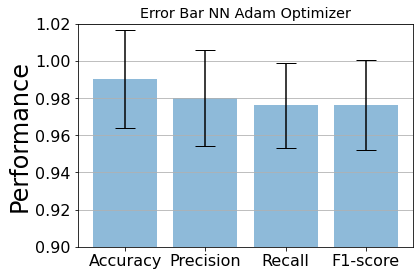

In [56]:
types = ['Accuracy','Precision', 'Recall', 'F1-score']
x_pos = np.arange(len(types))
CTEs = [0.9902679800987244,0.9798178427997707,0.9761507936507936,0.976151895122298]
#[.9892806768417358, 0.9761258923095031, 0.9632738095238095, 0.967611857976817]#adam
error = [0.02634917920915583,0.02580027326807595,0.0229223864228777, 0.02410207190812335]
#[0.02904269439572971,0.02695802966981639, 0.023258877265038686 ,0.0230362589282137]#adam
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Performance')
ax.set_xticks(x_pos)
ax.set_xticklabels(types)
ax.set_title('Error Bar NN Adam Optimizer')
ax.yaxis.grid(True)
ax.set_ylim(0.90,1.02)
# Save the figure and show
plt.tight_layout()
plt.savefig('NN_error_bar_SCros_Valid.png')
plt.show()

# Cross Validated Score with Error Bar 

In [19]:
# evaluate the model


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression

def cv_score(model, x, y, seed=123, kfold=10):
    cv = KFold(n_splits=kfold, shuffle=True, random_state=seed)
    
    scores_ = cross_validate(model, x, y, scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'), cv=cv, n_jobs=-1)
    print(scores_)

    
    acc_scores = scores_['test_accuracy']
    prc_scores = scores_['test_precision_macro']
    rcl_scores = scores_['test_recall_macro']
    f1_scores = scores_['test_f1_macro']
    
    means = []
    errors = []

    acc_mean = np.mean(acc_scores)
    acc_error = np.std(acc_scores)/np.sqrt(len(acc_scores))
    print("accuracy: ", acc_mean, acc_error)
    means.append(acc_mean)
    errors.append(acc_error)

    prc_mean = np.mean(prc_scores)
    prc_error = np.std(prc_scores)/np.sqrt(len(prc_scores))
    print("precision: ", prc_mean, prc_error)
    means.append(prc_mean)
    errors.append(prc_error)

    rcl_mean = np.mean(rcl_scores)
    rcl_error = np.std(rcl_scores)/np.sqrt(len(rcl_scores))
    print("recall: ", prc_mean, prc_error)
    means.append(rcl_mean)
    errors.append(rcl_error)
    
    f1_mean = np.mean(f1_scores)
    f1_error = np.std(f1_scores)/np.sqrt(len(f1_scores))
    print("f1: ", f1_mean, f1_error)
    means.append(f1_mean)
    errors.append(f1_error)

    xlbl = ["Accuracy", "Precision", "Recall", "F1-score"]

    plt.bar(xlbl, means, yerr=errors,color="grey" ) #label="accuracy")
#     plt.errorbar(xlbl, means, yerr=errors, fmt='o', color="red")
    plt.ylabel("Mean")
    plt.xlabel("Metric")
    plt.title("Cross-validation results with error(std. error) bar")
    plt.legend()
    plt.show()
    

# Original Data

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_84132/3986997646.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 468us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


32/32 [==============================] - 0s 498us/step
{'fit_time': array([35.7267251 , 35.36796069, 36.00110412, 35.88789129, 41.44794822,
       35.73267794, 35.66089821, 35.80871773, 15.21068907, 15.16096091]), 'score_time': array([0.09488797, 0.10617614, 0.07600498, 0.08446002, 0.0733428 ,
       0.09344101, 0.10608292, 0.08544993, 0.070539  , 0.08115983]), 'test_accuracy': array([0.9851925 , 0.99210267, 0.97433366, 0.98914116, 0.98716683,
       0.98914116, 0.98914116, 0.99012833, 0.9792695 , 0.94268775]), 'test_precision_macro': array([0.95930432, 0.97017234, 0.92169034, 0.97576009, 0.96320304,
       0.96978498, 0.96001913, 0.96958907, 0.9724876 , 0.8514881 ]), 'test_recall_macro': array([0.95895577, 0.96832447, 0.89816602, 0.96327505, 0.96530353,
       0.96970797, 0.97303529, 0.97013308, 0.93051948, 0.92360591]), 'test_f1_macro': array([0.95753301, 0.96920016, 0.90673066, 0.96886639, 0.96261838,
       0.96867976, 0.96468486, 0.96862303, 0.94960841, 0.88110885])}
accuracy:  0.

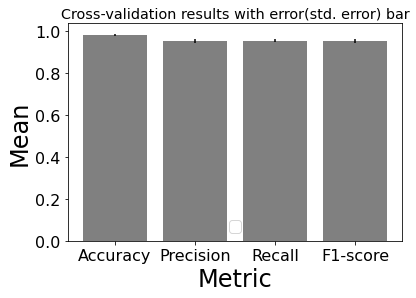

In [25]:
label_encoder = LabelEncoder()
input_dim = len(org_train_frame_x.columns)
def create_model():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
from keras.wrappers.scikit_learn import KerasClassifier

clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)

# Fit the model
org_train_x,org_train_y,org_test_x,org_test_y = data_fram_to_array(org_train_frame_x,org_train_frame_y,
                                                                   org_test_frame_x,org_test_frame_y)
X = np.concatenate([org_train_x, org_test_x], axis=0)
y = np.concatenate([org_train_y, org_test_y], axis=0)
# org_train_y = Label_Encoding(org_train_y,label_encoder)
# y = Label_Encoding(y,label_encoder)
clf.fit(org_train_x, org_train_y.ravel())
cv_score(clf, X, y.ravel())


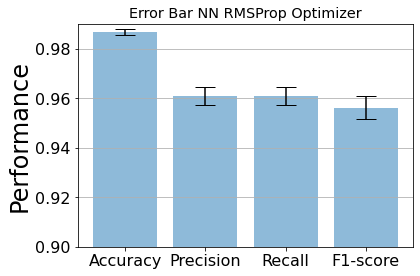

In [28]:
CTEs = [0.9865728728115526, 0.9608465297162245, 0.9608465297162245, 0.9561228655284058]  
error =[0.0012191189960147966,0.0035806867206424307, 0.0035806867206424307, 0.004675175843904274]
types = ['Accuracy','Precision', 'Recall', 'F1-score']
x_pos = np.arange(len(types))
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Performance')
ax.set_xticks(x_pos)
ax.set_xticklabels(types)
ax.set_title('Error Bar NN RMSProp Optimizer')
ax.yaxis.grid(True)
ax.set_ylim(0.90,.99)
# Save the figure and show
plt.tight_layout()
plt.savefig('NN_error_bar_SCros_Valid_RMSProp.png')
plt.show()

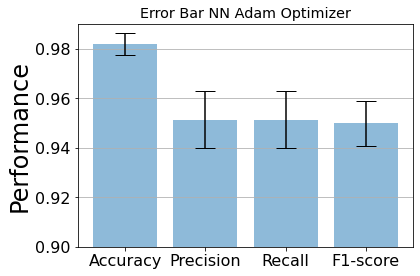

In [27]:
CTEs =  [0.9818304726305069,0.9513499003807213,0.9513499003807213,0.9497653512725016]
error =[0.004437797577820739,0.01148932477770954,0.01148932477770954,0.009203141244808755]
types = ['Accuracy','Precision', 'Recall', 'F1-score']
x_pos = np.arange(len(types))
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Performance')
ax.set_xticks(x_pos)
ax.set_xticklabels(types)
ax.set_title('Error Bar NN Adam Optimizer')
ax.yaxis.grid(True)
ax.set_ylim(0.90,.99)
# Save the figure and show
plt.tight_layout()
plt.savefig('NN_error_bar_SCros_Valid_Adam.png')
plt.show()

# Min-max Normalization 

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_84132/3607138236.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)
2022-11-07 22:00:38.625618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 22:00:38.625618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild Tenso

32/32 [==============================] - 0s 502us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


32/32 [==============================] - 0s 500us/step
{'fit_time': array([41.42431188, 38.63758588, 41.43093109, 38.45086598, 38.82800007,
       38.72224474, 38.65363598, 38.24152613, 14.75633001, 14.69497013]), 'score_time': array([0.10716128, 0.12250113, 0.104774  , 0.19892597, 0.11001205,
       0.12189913, 0.14647985, 0.1337769 , 0.06942987, 0.07110596]), 'test_accuracy': array([0.9970385 , 0.99605133, 0.99506417, 0.994077  , 0.99012833,
       0.9970385 , 0.99506417, 0.994077  , 0.99308983, 0.993083  ]), 'test_precision_macro': array([0.98699324, 0.98877753, 0.98333333, 0.97985761, 0.96819643,
       0.99074074, 0.97881356, 0.97827506, 0.97637085, 0.97578036]), 'test_recall_macro': array([0.98995495, 0.9826968 , 0.98194103, 0.97985761, 0.97174661,
       0.98913043, 0.98641304, 0.98044341, 0.98250112, 0.97305302]), 'test_f1_macro': array([0.98842351, 0.98567644, 0.98214129, 0.97985761, 0.96967981,
       0.98972746, 0.98195481, 0.97905402, 0.9793881 , 0.9743671 ])}
accuracy:  0.

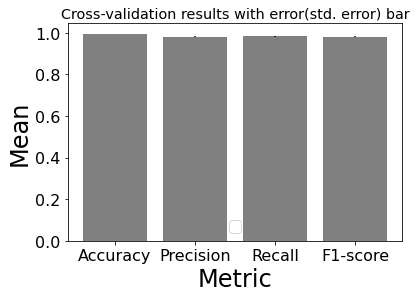

In [29]:
label_encoder = LabelEncoder()
input_dim = len(mNorm_train_frame_x.columns)
def create_model():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
from keras.wrappers.scikit_learn import KerasClassifier

clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)

# Fit the model
mNorm_train_x,mNorm_train_y,mNorm_test_x,mNorm_test_y = data_fram_to_array(mNorm_train_frame_x,mNorm_train_frame_y,
                                                                   mNorm_test_frame_x,mNorm_test_frame_y)
X = np.concatenate([mNorm_train_x, mNorm_test_x], axis=0)
y = np.concatenate([mNorm_train_y, mNorm_test_y], axis=0)
# org_train_y = Label_Encoding(org_train_y,label_encoder)
# y = Label_Encoding(y,label_encoder)
clf.fit(mNorm_train_x, mNorm_train_y.ravel())
cv_score(clf, X, y.ravel())


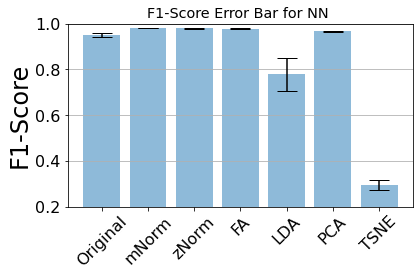

In [39]:
CTEs =  [0.9497653512725016,0.9810270141957794,0.9794520564363394,0.9772649937497728,0.7788858831401514,
         0.9665491610131243,0.2930800245225663]
error =[0.009203141244808755,0.0018308063984849201,0.002443413933270885,0.0024592403162444418,0.07150211530594969,
       0.002351662644364948,0.02240749957383214]
types = ['Original','mNorm', 'zNorm', 'FA','LDA','PCA','TSNE']
x_pos = np.arange(len(types))
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('F1-Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(types,rotation = 45)
ax.set_title('F1-Score Error Bar for NN ')
ax.yaxis.grid(True)
ax.set_ylim(0.20,1.0)
# Save the figure and show
plt.tight_layout()
plt.savefig('NN_error_bar_SCros_Valid_Adam_F1-Scor.png')
plt.show()

# Z - Normalization 

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_84132/747938204.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 476us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'fit_time': array([35.88801789, 35.72368693, 36.19001293, 36.09807086, 35.79959393,
       36.26788092, 35.96143222, 35.58137608, 14.42958212, 14.42178679]), 'score_time': array([0.18265009, 0.200984  , 0.08333993, 0.09050083, 0.18310189,
       0.09084845, 0.0968318 , 0.16203904, 0.07011318, 0.06659031]), 'test_accuracy': array([0.99506417, 0.99605133, 0.9970385 , 0.99605133, 0.994077  ,
       0.994077  , 0.99210267, 0.99210267, 0.99308983, 0.99011858]), 'test_precision_macro': array([0.98635669, 0.98983254, 0.98979786, 0.98657174, 0.98192103,
       0.98463525, 0.97227905, 0.97032867, 0.97661611, 0.96885931]), 'test_recall_macro': array([0.9831982 , 0.9820231 , 0.98831169, 0.98657174, 0.98192103,
       0.97826087, 0.96869968, 0.97458083, 0.98250112, 0.96175958]), 'test_f1_macro': array([0.98472112, 0.98564075, 0.98897741, 0.98657174, 0.98192103,
       0.98072004, 0.97037939, 0.97240996, 0.97953617, 0.96364298])}
accuracy:  0.9939773068684181 0.0006471566620304619
precision:  0.98

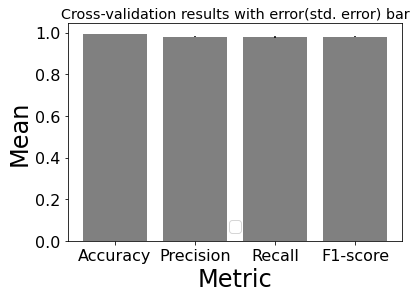

In [30]:
label_encoder = LabelEncoder()
input_dim = len(zNorm_train_frame_x.columns)
def create_model():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
from keras.wrappers.scikit_learn import KerasClassifier

clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)

# Fit the model
zNorm_train_x,zNorm_train_y,zNorm_test_x,zNorm_test_y = data_fram_to_array(zNorm_train_frame_x,zNorm_train_frame_y,
                                                                   zNorm_test_frame_x,zNorm_test_frame_y)
X = np.concatenate([zNorm_train_x, zNorm_test_x], axis=0)
y = np.concatenate([zNorm_train_y, zNorm_test_y], axis=0)
# org_train_y = Label_Encoding(org_train_y,label_encoder)
# y = Label_Encoding(y,label_encoder)
clf.fit(zNorm_train_x, zNorm_train_y.ravel())
cv_score(clf, X, y.ravel())


/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_84132/2872032872.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 534us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


32/32 [==============================] - 0s 483us/step
{'fit_time': array([35.00830698, 35.18598127, 35.05052304, 34.86002994, 41.38611388,
       34.96148396, 34.73820901, 34.88566685, 14.75135684, 14.7954812 ]), 'score_time': array([0.09723687, 0.07827783, 0.08583808, 0.10846782, 0.08008885,
       0.09572887, 0.116714  , 0.09667516, 0.07114601, 0.07001281]), 'test_accuracy': array([0.9970385 , 0.99506417, 0.99210267, 0.994077  , 0.99210267,
       0.994077  , 0.9911155 , 0.99605133, 0.99012833, 0.99110672]), 'test_precision_macro': array([0.98699324, 0.98546367, 0.97238095, 0.97985761, 0.97208761,
       0.98463525, 0.96459186, 0.98828565, 0.96846462, 0.9716415 ]), 'test_recall_macro': array([0.98995495, 0.97859844, 0.9710337 , 0.97985761, 0.97490021,
       0.97826087, 0.971719  , 0.9921919 , 0.97634908, 0.96533101]), 'test_f1_macro': array([0.98842351, 0.98188674, 0.97167574, 0.97985761, 0.97348363,
       0.98072004, 0.96751866, 0.99019299, 0.97171526, 0.96717577])}
accuracy:  0.

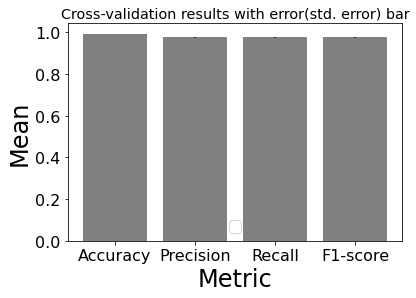

In [31]:
label_encoder = LabelEncoder()
input_dim = len(fa_train_frame_x.columns)
def create_model():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
from keras.wrappers.scikit_learn import KerasClassifier

clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)

# Fit the model
fa_train_x,fa_train_y,fa_test_x,fa_test_y = data_fram_to_array(fa_train_frame_x,fa_train_frame_y,
                                                                   fa_test_frame_x,fa_test_frame_y)
X = np.concatenate([fa_train_x, fa_test_x], axis=0)
y = np.concatenate([fa_train_y, fa_test_y], axis=0)
# org_train_y = Label_Encoding(org_train_y,label_encoder)
# y = Label_Encoding(y,label_encoder)
clf.fit(fa_train_x, fa_train_y.ravel())
cv_score(clf, X, y.ravel())


/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_84132/722358184.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)


 1/32 [..............................] - ETA: 1s

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 0s 538us/step


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


32/32 [==============================] - 0s 487us/step
{'fit_time': array([34.39960599, 34.87357163, 34.76199889, 34.9669559 , 34.54442191,
       34.7880671 , 34.69552588, 34.49314833, 14.41327095, 14.32137704]), 'score_time': array([0.13262296, 0.08894014, 0.09909916, 0.0804739 , 0.12396908,
       0.08893085, 0.10131788, 0.12976098, 0.07138395, 0.0711019 ]), 'test_accuracy': array([0.81441264, 0.94965449, 0.94965449, 0.99506417, 0.93583416,
       0.98914116, 0.98914116, 0.9911155 , 0.96544916, 0.94664032]), 'test_precision_macro': array([0.20360316, 0.62426471, 0.82807706, 0.9831982 , 0.61947021,
       0.95662393, 0.96252022, 0.97021926, 0.89505696, 0.6174431 ]), 'test_recall_macro': array([0.25      , 0.7260274 , 0.81635662, 0.98328226, 0.71340018,
       0.96120741, 0.96628422, 0.97365421, 0.90433833, 0.70761276]), 'test_f1_macro': array([0.22442873, 0.66676198, 0.81894423, 0.98321845, 0.65298923,
       0.95877822, 0.96293219, 0.9705429 , 0.89567066, 0.65459224])}
accuracy:  0.

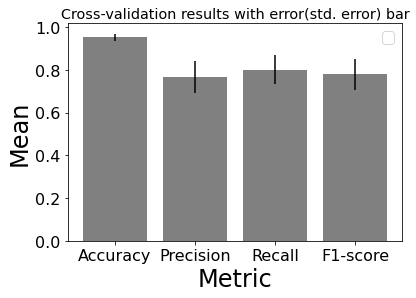

In [32]:
label_encoder = LabelEncoder()
input_dim = len(lda_train_frame_x.columns)
def create_model():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
from keras.wrappers.scikit_learn import KerasClassifier

clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)

# Fit the model
lda_train_x,lda_train_y,lda_test_x,lda_test_y = data_fram_to_array(lda_train_frame_x,lda_train_frame_y,
                                                                   lda_test_frame_x,lda_test_frame_y)
X = np.concatenate([lda_train_x, lda_test_x], axis=0)
y = np.concatenate([lda_train_y, lda_test_y], axis=0)
# org_train_y = Label_Encoding(org_train_y,label_encoder)
# y = Label_Encoding(y,label_encoder)
clf.fit(lda_train_x, lda_train_y.ravel())
cv_score(clf, X, y.ravel())


/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_84132/191707444.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 568us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


32/32 [==============================] - 0s 486us/step
{'fit_time': array([34.5912137 , 34.47782087, 34.8952136 , 34.97518206, 34.94242406,
       35.16322374, 35.13365412, 34.89543223, 14.65418291, 14.60763407]), 'score_time': array([0.10963821, 0.12737298, 0.11330223, 0.10049009, 0.09585619,
       0.07709622, 0.08012605, 0.10438871, 0.07092881, 0.07158518]), 'test_accuracy': array([0.988154  , 0.9911155 , 0.99210267, 0.9911155 , 0.99012833,
       0.988154  , 0.99210267, 0.99308983, 0.98914116, 0.98517787]), 'test_precision_macro': array([0.9598504 , 0.9724185 , 0.97289667, 0.97266847, 0.96799146,
       0.95765382, 0.97227905, 0.9738684 , 0.96314103, 0.95080176]), 'test_recall_macro': array([0.95977477, 0.96489981, 0.96986662, 0.969854  , 0.96876313,
       0.96898503, 0.96869968, 0.98116249, 0.97180363, 0.9511837 ]), 'test_f1_macro': array([0.95972973, 0.9684606 , 0.97119104, 0.9712082 , 0.96816997,
       0.96291702, 0.97037939, 0.9772109 , 0.96741556, 0.9488092 ])}
accuracy:  0.

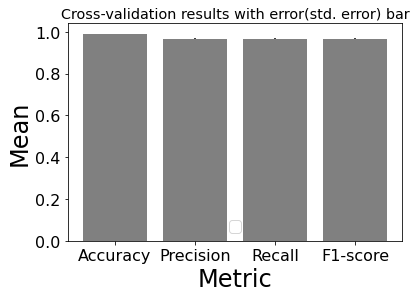

In [33]:
label_encoder = LabelEncoder()
input_dim = len(pca_train_frame_x.columns)
def create_model():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
from keras.wrappers.scikit_learn import KerasClassifier

clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)

# Fit the model
pca_train_x,pca_train_y,pca_test_x,pca_test_y = data_fram_to_array(pca_train_frame_x,pca_train_frame_y,
                                                                   pca_test_frame_x,pca_test_frame_y)
X = np.concatenate([pca_train_x, pca_test_x], axis=0)
y = np.concatenate([pca_train_y, pca_test_y], axis=0)
# org_train_y = Label_Encoding(org_train_y,label_encoder)
# y = Label_Encoding(y,label_encoder)
clf.fit(pca_train_x, pca_train_y.ravel())
cv_score(clf, X, y.ravel())


/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_84132/2123640303.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 1ms/step


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

 1/32 [..............................] - ETA: 1s

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

32/32 [==============================] - 0s 675us/step


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

32/32 [==============================] - 0s 483us/step
{'fit_time': array([34.98723102, 34.56197619, 35.02838802, 34.56100392, 34.61529016,
       35.11980891, 35.14717793, 34.62682772, 14.67181325, 14.62594676]), 'score_time': array([0.09204912, 0.11019588, 0.08508801, 0.10870099, 0.12778187,
       0.08575916, 0.09273601, 0.09570408, 0.07245374, 0.07356715]), 'test_accuracy': array([0.81441264, 0.82625864, 0.8035538 , 0.8094768 , 0.82625864,
       0.80750247, 0.8035538 , 0.8213228 , 0.80848963, 0.81719368]), 'test_precision_macro': array([0.20360316, 0.32318771, 0.20088845, 0.2023692 , 0.32255988,
       0.40364629, 0.20597166, 0.31717671, 0.31533576, 0.20429842]), 'test_recall_macro': array([0.25      , 0.47874251, 0.25      , 0.25      , 0.46496328,
       0.44414274, 0.24255066, 0.47984001, 0.48060345, 0.25      ]), 'test_f1_macro': array([0.22442873, 0.35308306, 0.22276957, 0.22367703, 0.3602588 ,
       0.40219041, 0.22276957, 0.34923352, 0.34753911, 0.22485046])}
accuracy:  0.

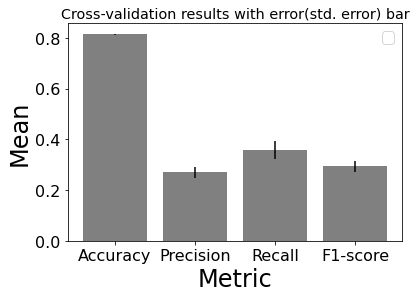

In [34]:
label_encoder = LabelEncoder()
input_dim = len(tsne_train_frame_x.columns)
def create_model():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
from keras.wrappers.scikit_learn import KerasClassifier

clf = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)

# Fit the model
tsne_train_x,tsne_train_y,tsne_test_x,tsne_test_y = data_fram_to_array(tsne_train_frame_x,tsne_train_frame_y,
                                                                   tsne_test_frame_x,tsne_test_frame_y)
X = np.concatenate([tsne_train_x, tsne_test_x], axis=0)
y = np.concatenate([tsne_train_y, tsne_test_y], axis=0)
# org_train_y = Label_Encoding(org_train_y,label_encoder)
# y = Label_Encoding(y,label_encoder)
clf.fit(tsne_train_x, tsne_train_y.ravel())
cv_score(clf, X, y.ravel())

# Rms prop -- Optimizer 

# Stochastic Gradient Descent

In [ ]:
x